In [1]:
!#kaggle competitions download -c playground-series-s4e4


100%|██████████████████████████████████████| 2.41M/2.41M [00:02<00:00, 1.19MB/s]
100%|██████████████████████████████████████| 2.41M/2.41M [00:02<00:00, 1.03MB/s]


In [2]:
#!unzip "/Users/namanmuktha/Desktop/ML/ML_CP/playground-series-s4e4.zip"

Archive:  /Users/namanmuktha/Desktop/ML/ML_CP/playground-series-s4e4.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0   0   F   0.550     0.430   0.150        0.7715          0.3285   
1   1   F   0.630     0.490   0.145        1.1300          0.4580   
2   2   I   0.160     0.110   0.025        0.0210          0.0055   
3   3   M   0.595     0.475   0.150        0.9145          0.3755   
4   4   I   0.555     0.425   0.130        0.7820          0.3695   

   Whole weight.2  Shell weight  Rings  
0          0.1465        0.2400     11  
1          0.2765        0.3200     11  
2          0.0030        0.0050      6  
3          0.2055        0.2500     10  
4          0.1600        0.1975      9

In [4]:
df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
df.nunique()

id                90615
Sex                   3
Length              157
Diameter            126
Height               90
Whole weight       3175
Whole weight.1     1799
Whole weight.2      979
Shell weight       1129
Rings                28
dtype: int64

In [6]:
df.shape

(90615, 10)

<Axes: xlabel='Whole weight.2', ylabel='Whole weight.1'>

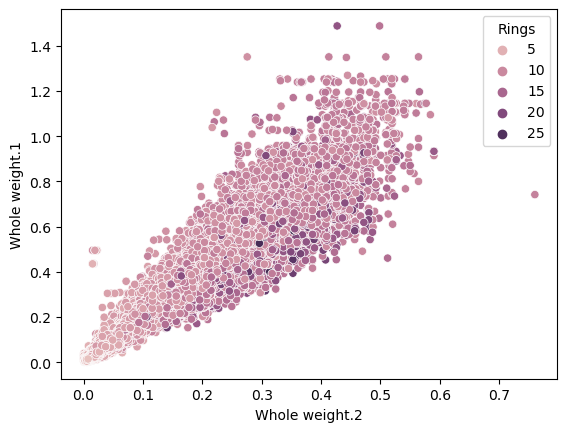

In [7]:
sns.scatterplot(data=df,x="Whole weight.2",y="Whole weight.1",hue="Rings")

<Axes: xlabel='Length', ylabel='Rings'>

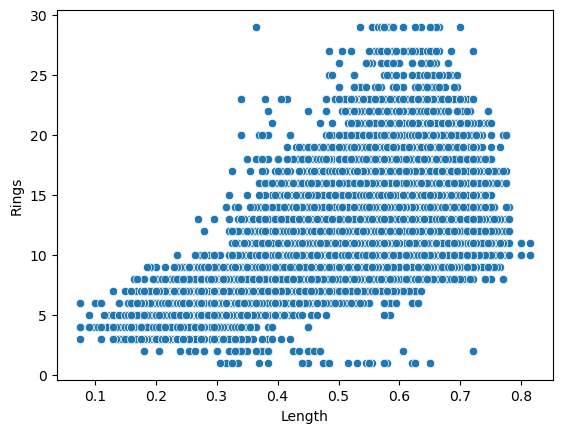

In [8]:
sns.scatterplot(data=df,x="Length",y="Rings")

In [9]:
df["Sex"].unique()

array(['F', 'I', 'M'], dtype=object)

In [10]:
df.describe()

id        Length      Diameter        Height  Whole weight  \
count  90615.000000  90615.000000  90615.000000  90615.000000  90615.000000   
mean   45307.000000      0.517098      0.401679      0.135464      0.789035   
std    26158.441658      0.118217      0.098026      0.038008      0.457671   
min        0.000000      0.075000      0.055000      0.000000      0.002000   
25%    22653.500000      0.445000      0.345000      0.110000      0.419000   
50%    45307.000000      0.545000      0.425000      0.140000      0.799500   
75%    67960.500000      0.600000      0.470000      0.160000      1.067500   
max    90614.000000      0.815000      0.650000      1.130000      2.825500   

       Whole weight.1  Whole weight.2  Shell weight         Rings  
count    90615.000000    90615.000000  90615.000000  90615.000000  
mean         0.340778        0.169422      0.225898      9.696794  
std          0.204428        0.100909      0.130203      3.176221  
min          0.001000        0.000500      0.001500      1.000000  
25%          0.177500        0.086500      0.120000      8.000000  
50%          0.330000        0.166000      0.225000      9.000000  
75%          0.463000        0.232500      0.305000     11.000000  
max          1.488000        0.760000      1.005000     29.000000

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>],
       [<Axes: title={'center': 'Whole weight.2'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

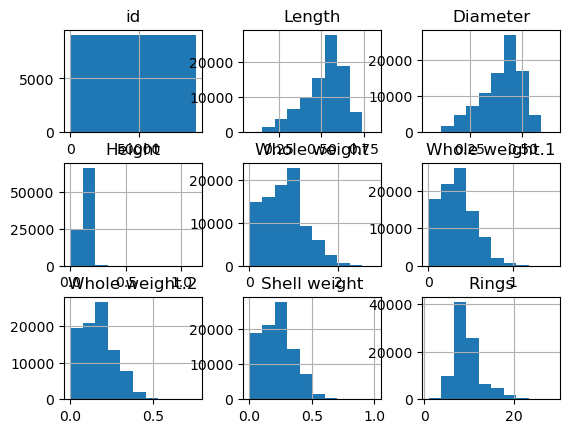

In [11]:
df.hist()

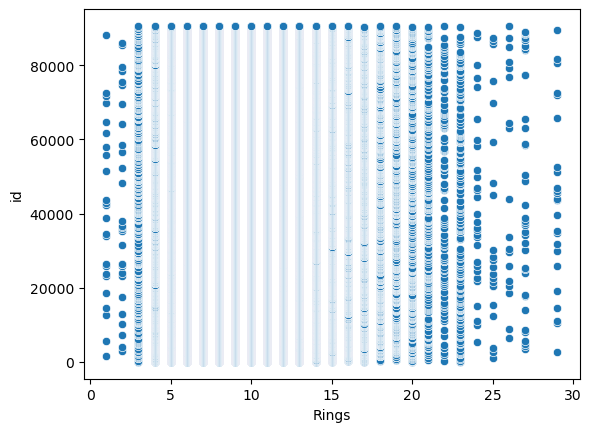

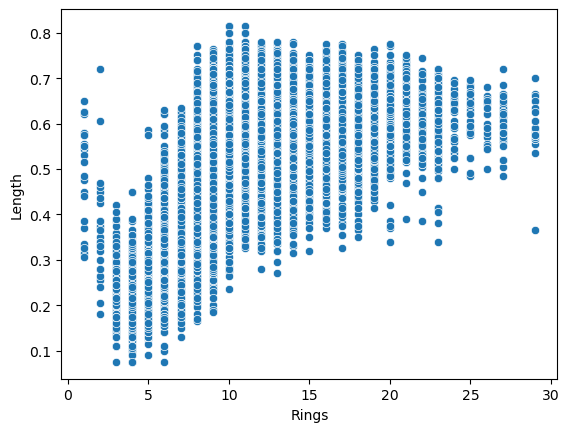

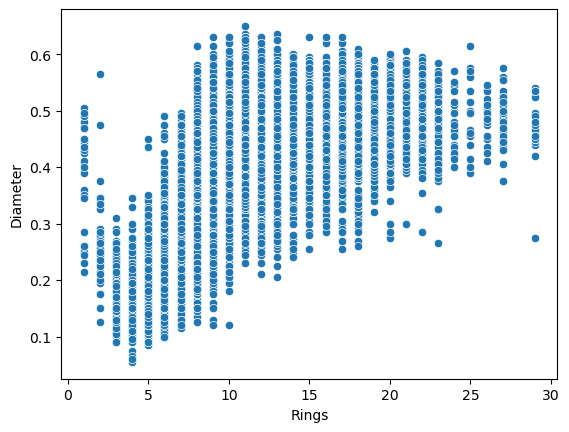

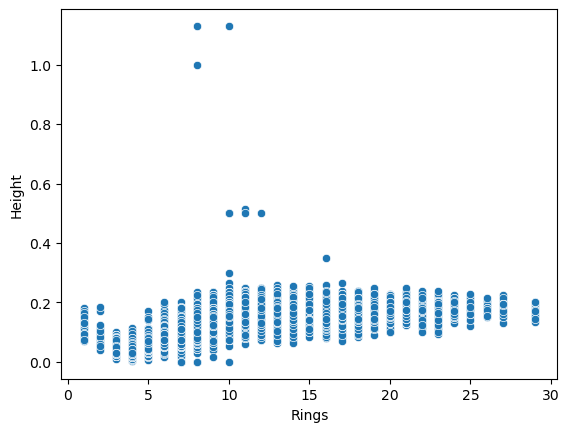

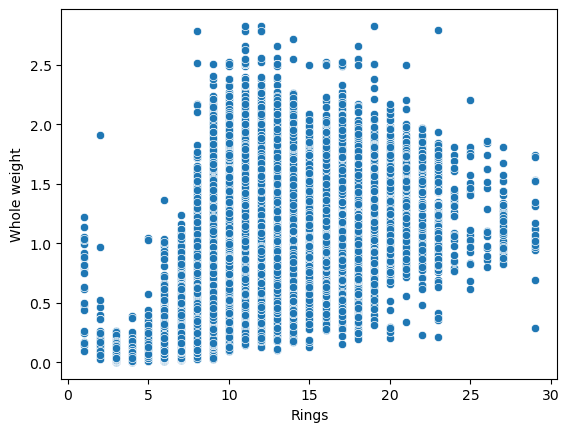

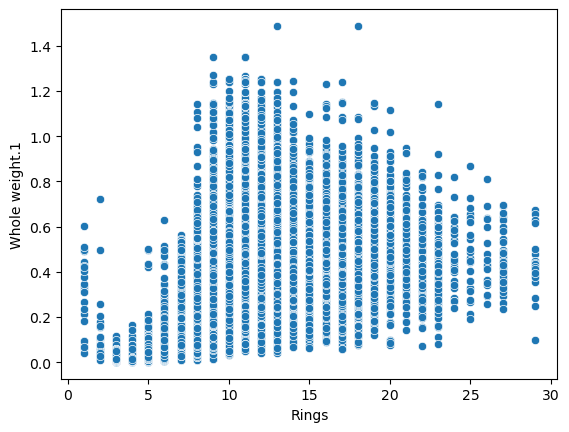

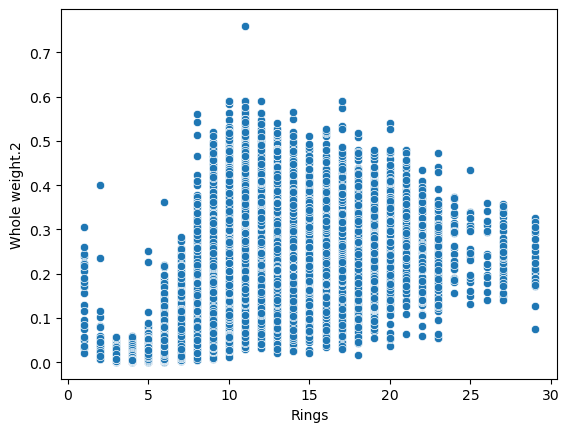

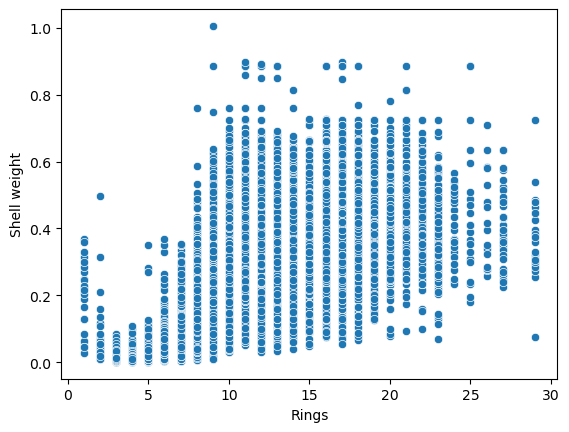

In [12]:
for i in df.columns:
    if i != "Rings" and i!="Sex":
        sns.scatterplot(data=df,x="Rings",y=i)
        plt.show()

<Axes: xlabel='Sex', ylabel='Rings'>

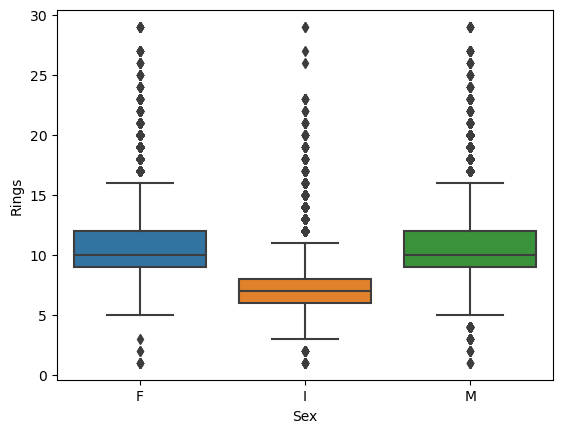

In [13]:
sns.boxplot(data=df,x="Sex",y="Rings")

In [14]:
import category_encoders as ce 
encoder=ce.OrdinalEncoder(cols=["Sex"])
df=encoder.fit_transform(df)

In [15]:
corr=df.corr()

<Axes: >

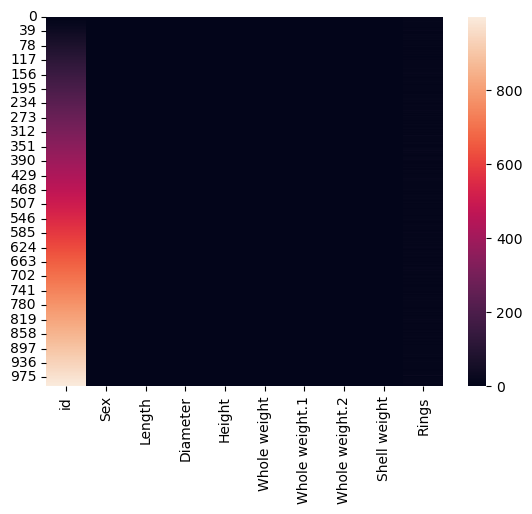

In [16]:
sns.heatmap(data=df[:1000])

In [17]:
corr["Rings"].sort_values()

Sex              -0.026308
id                0.000938
Whole weight.1    0.515067
Whole weight.2    0.588954
Whole weight      0.617274
Length            0.623786
Diameter          0.636832
Height            0.665772
Shell weight      0.694766
Rings             1.000000
Name: Rings, dtype: float64

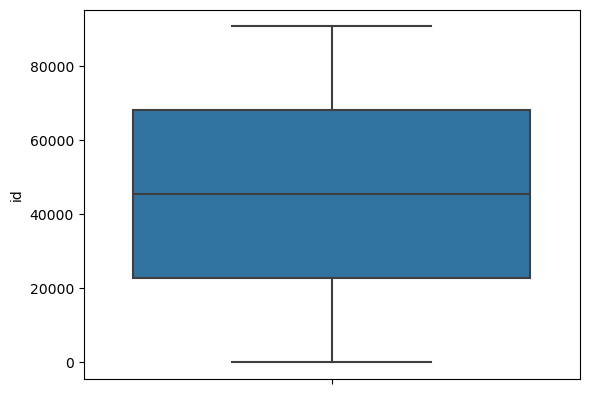

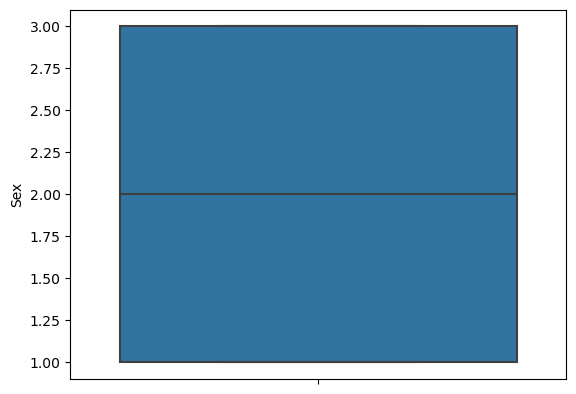

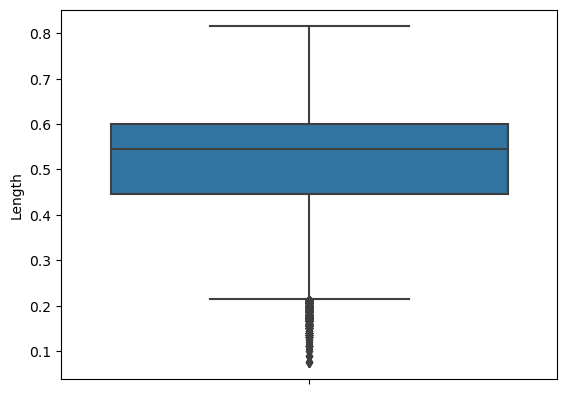

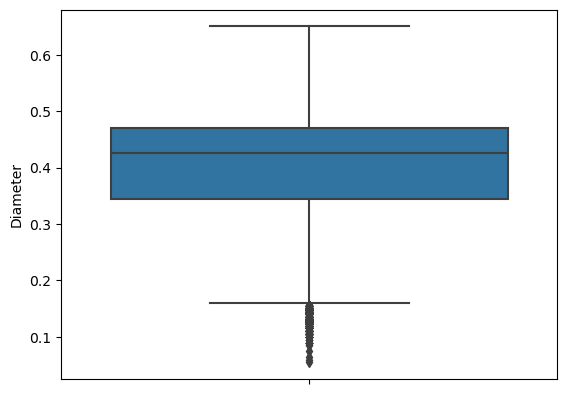

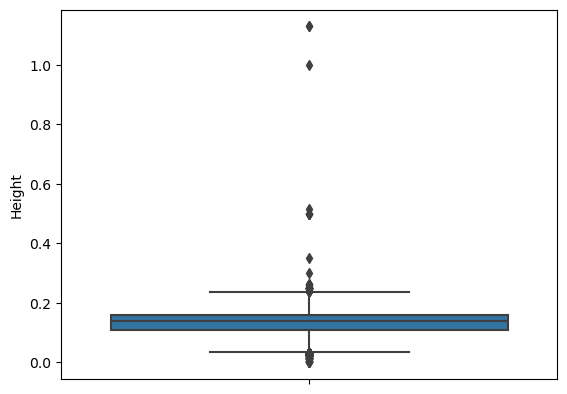

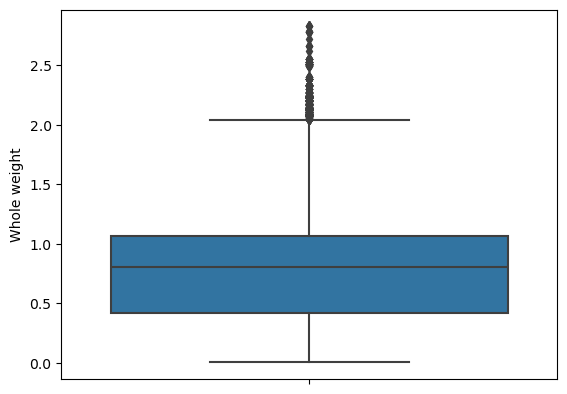

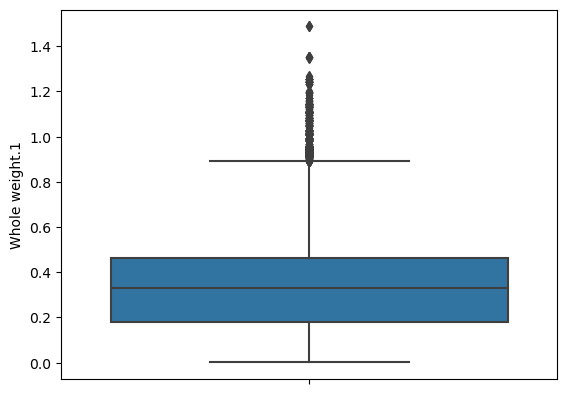

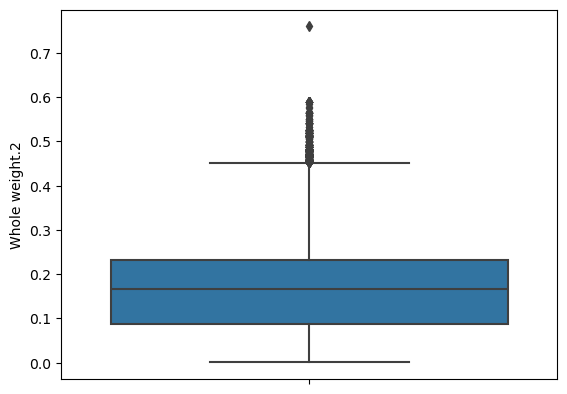

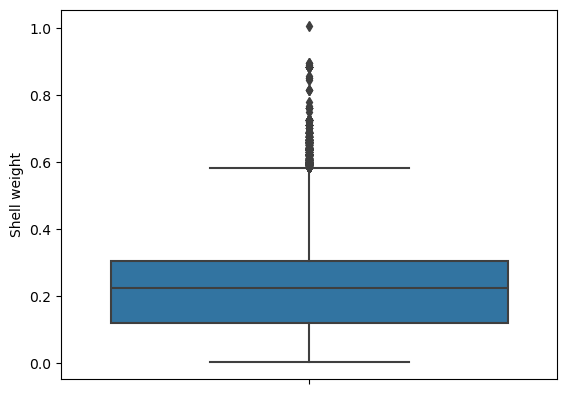

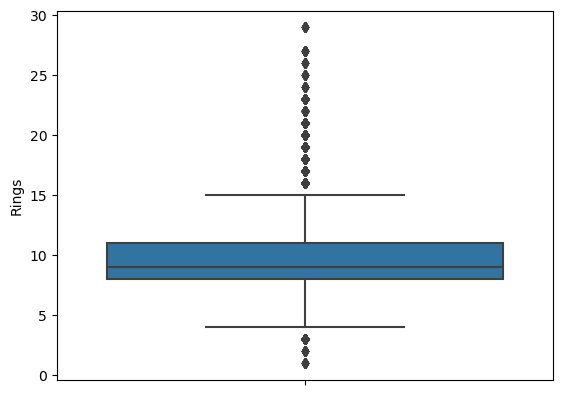

In [18]:
for i in df.columns:
    sns.boxplot(data=df,y=i)
    plt.show()

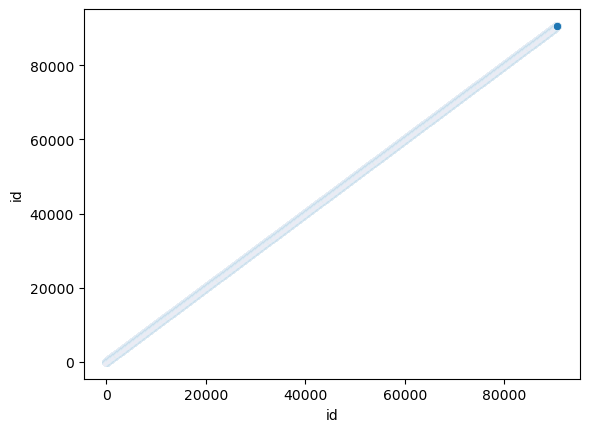

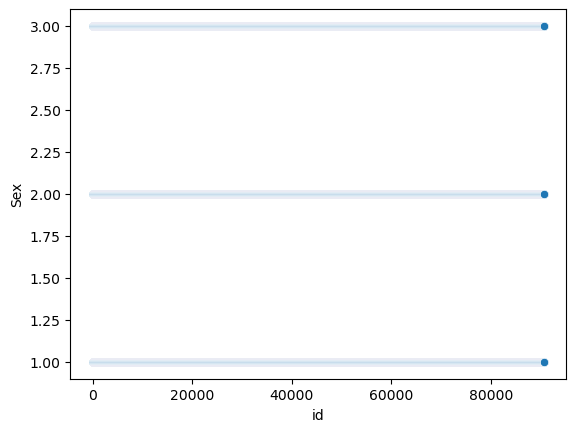

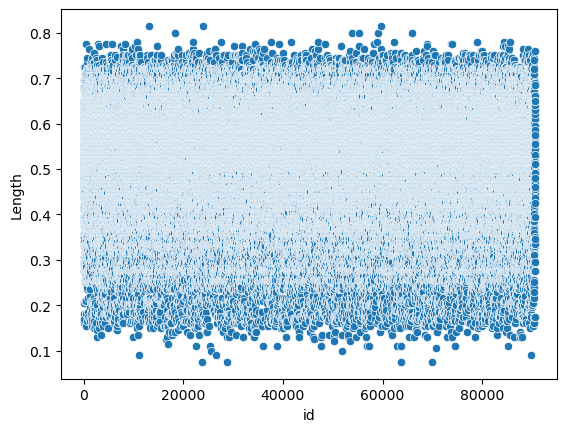

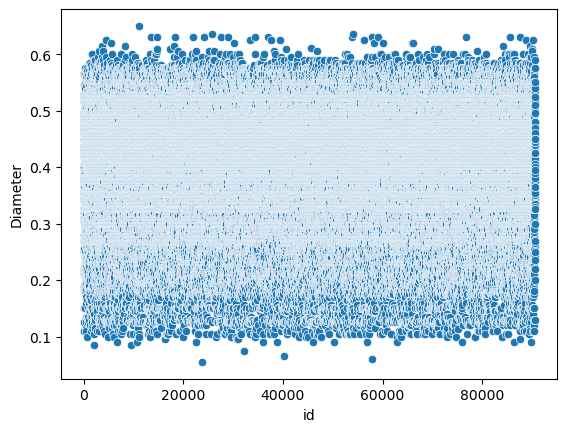

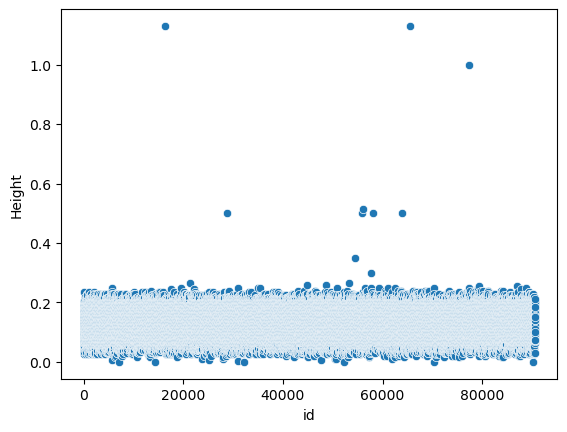

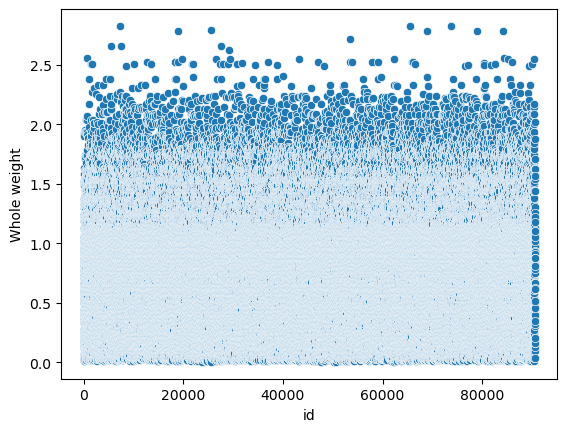

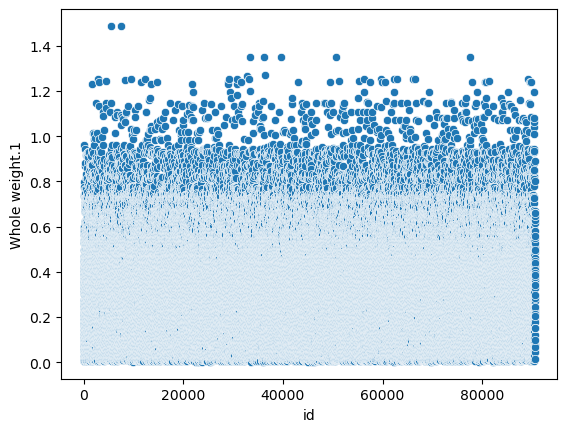

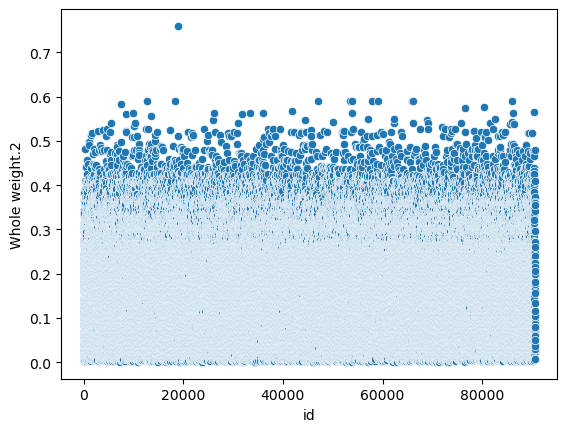

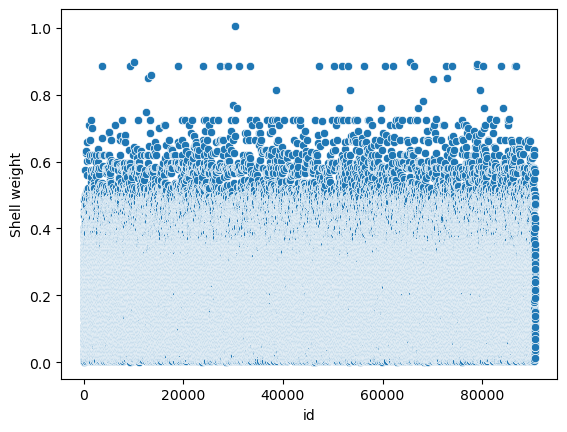

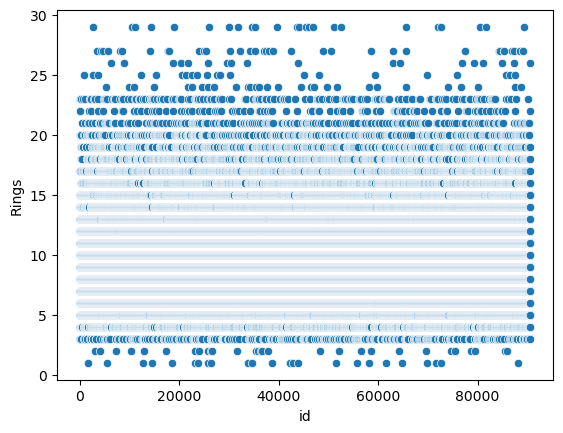

In [19]:
for i in df.columns:
    sns.scatterplot(data=df,x="id",y=i)
    plt.show()

In [20]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

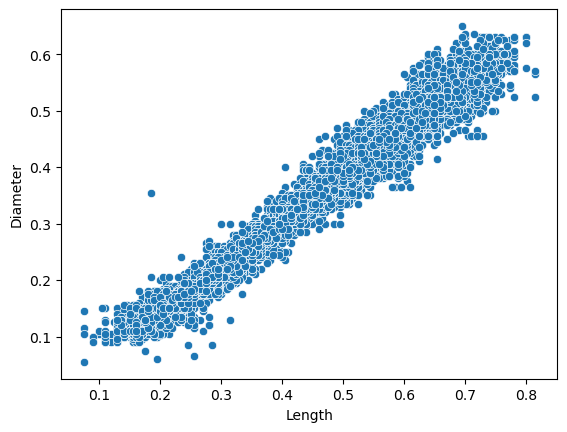

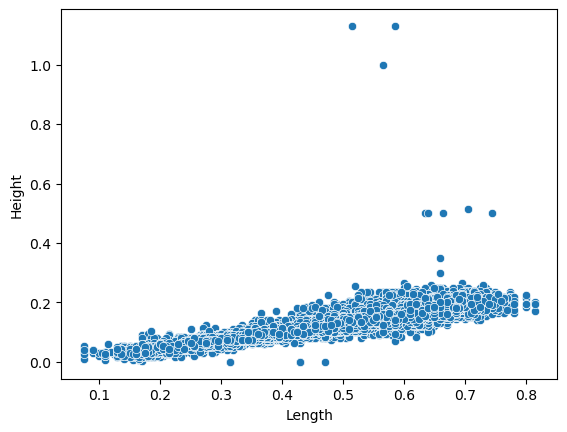

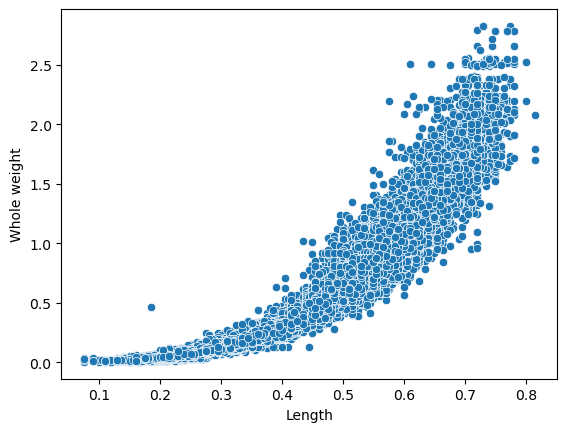

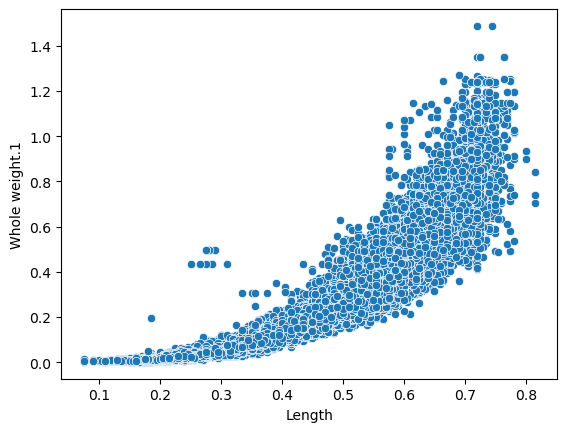

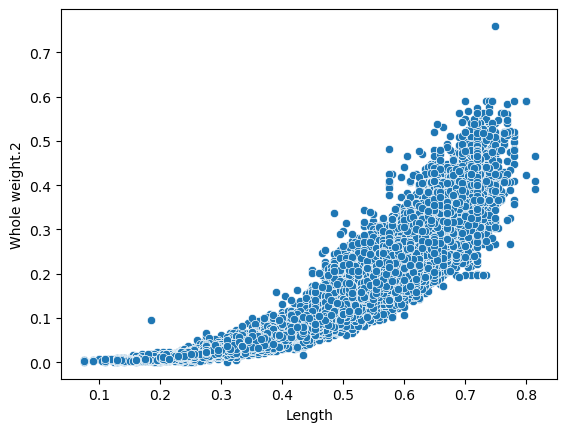

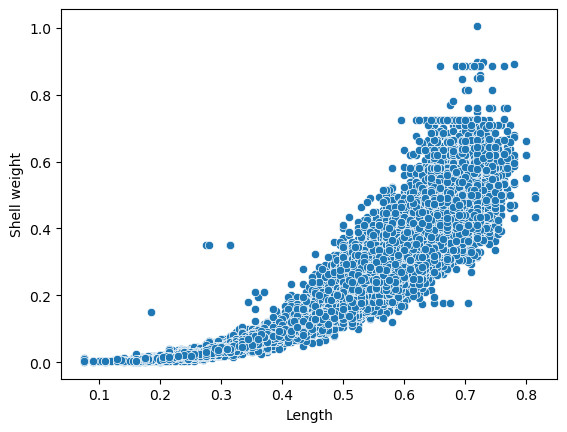

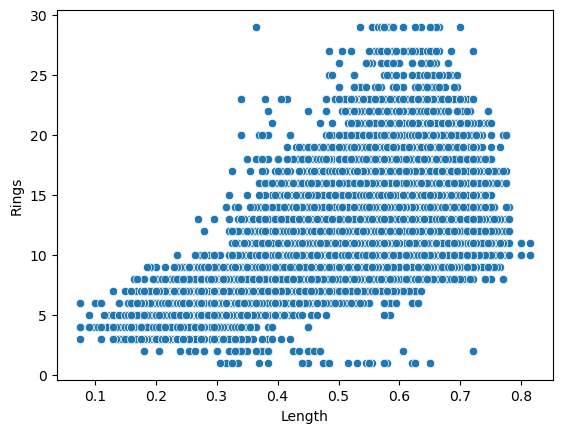

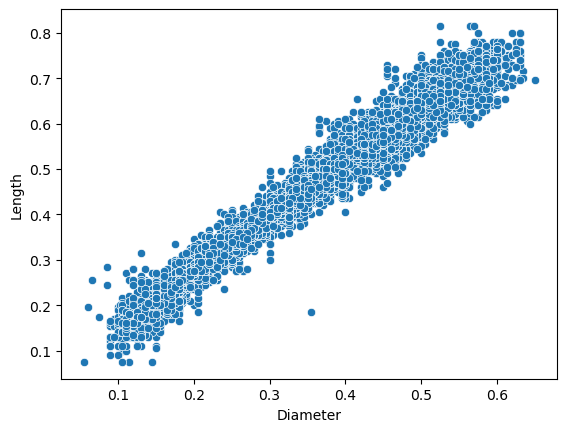

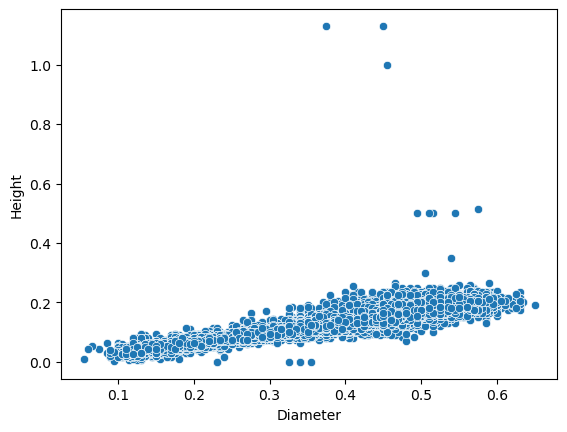

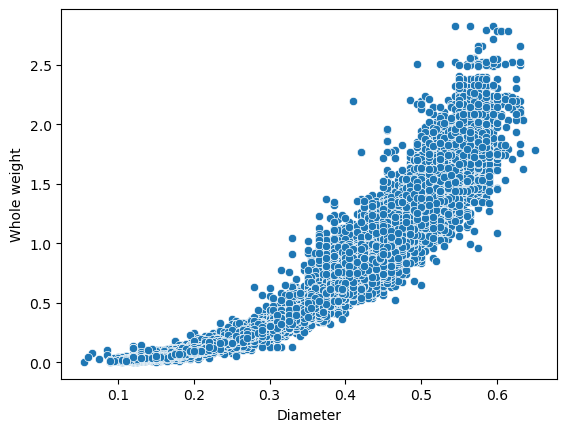

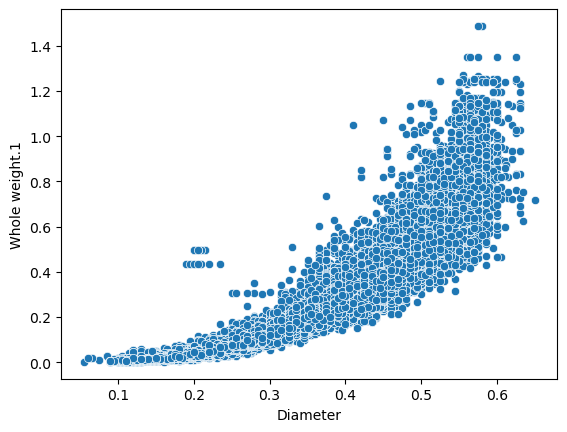

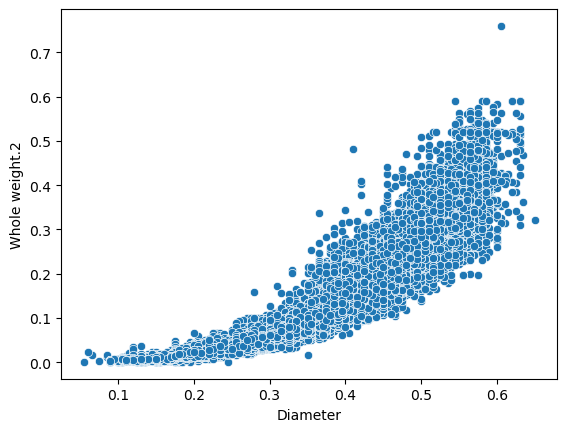

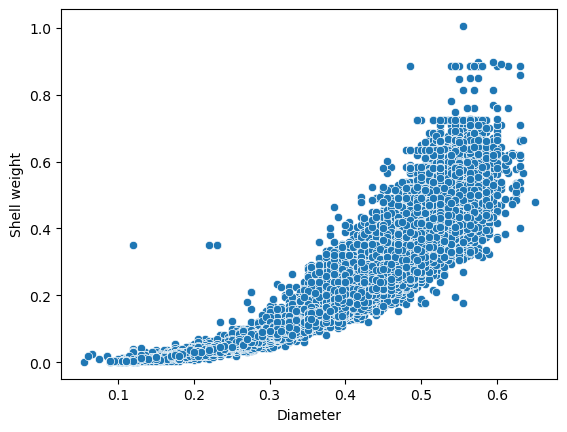

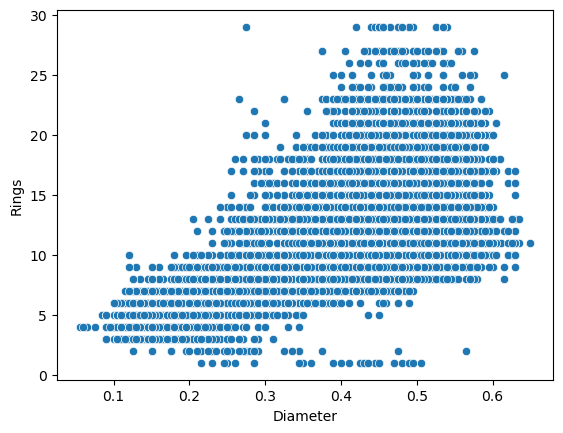

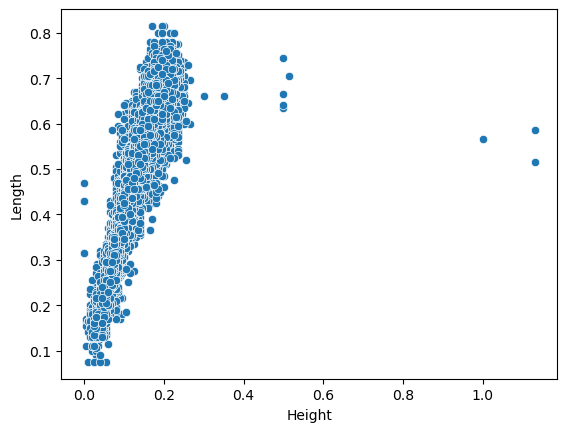

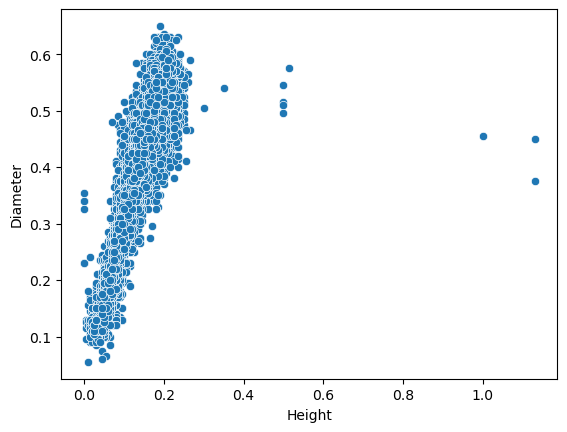

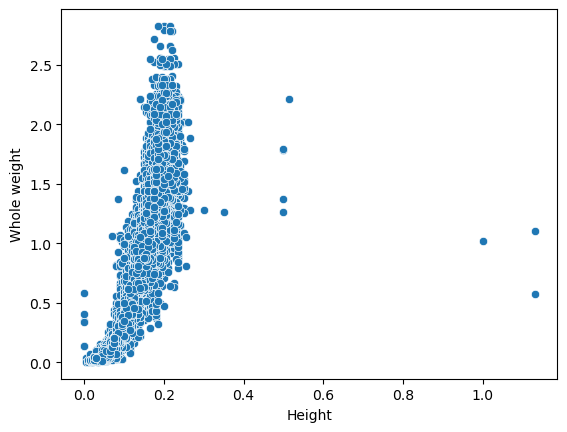

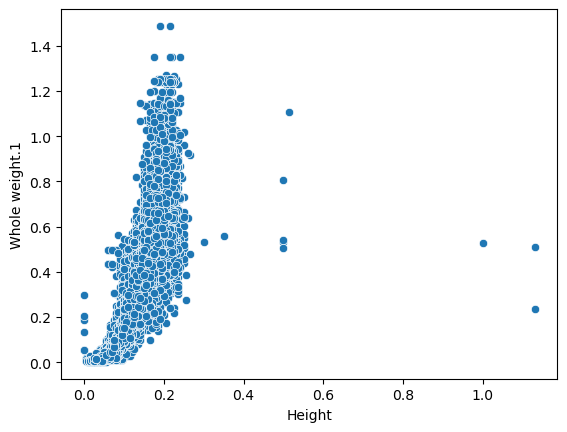

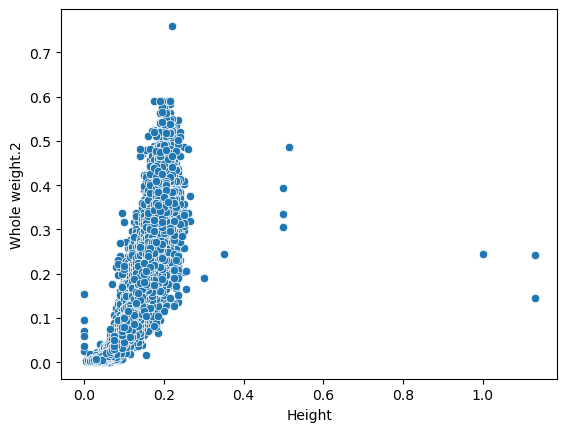

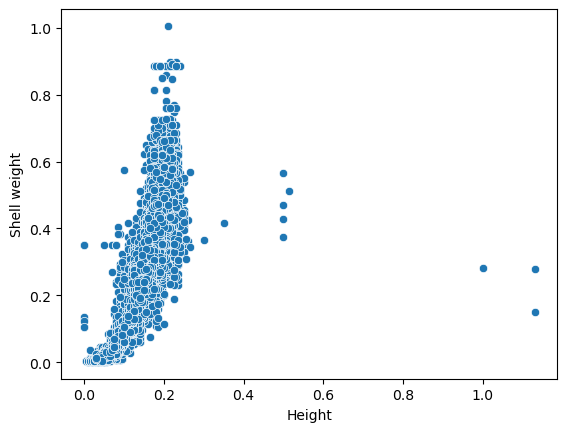

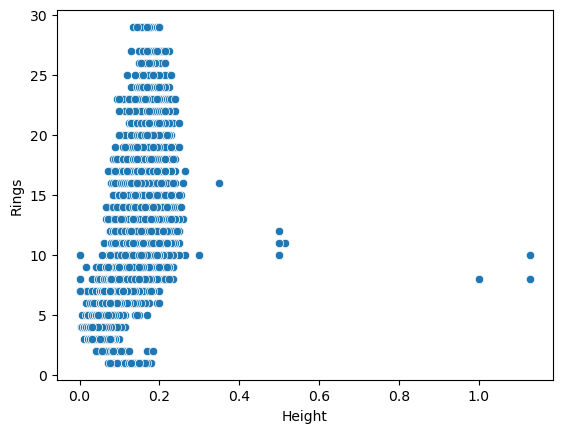

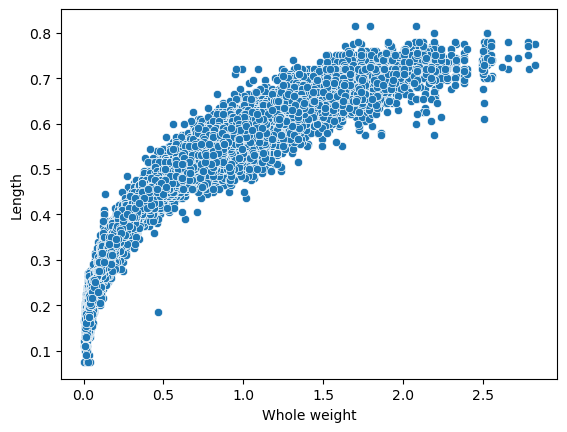

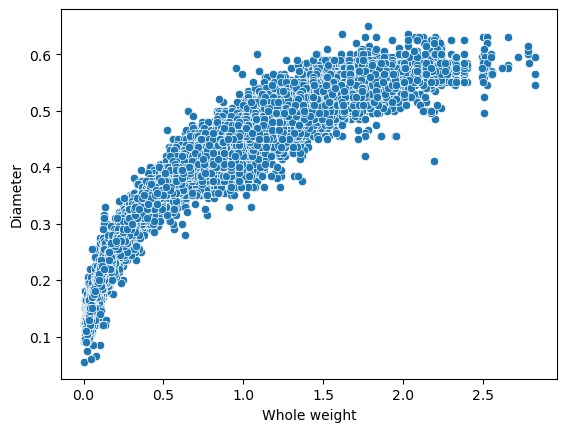

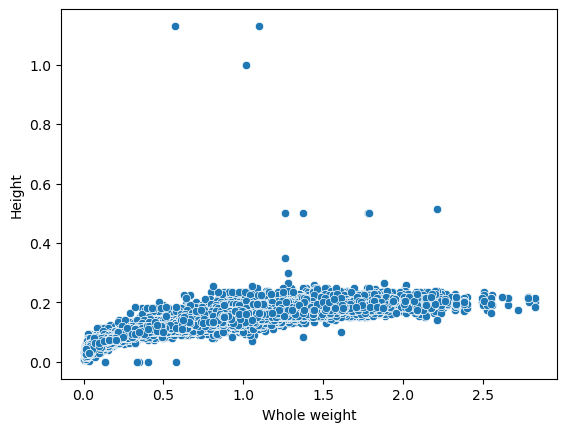

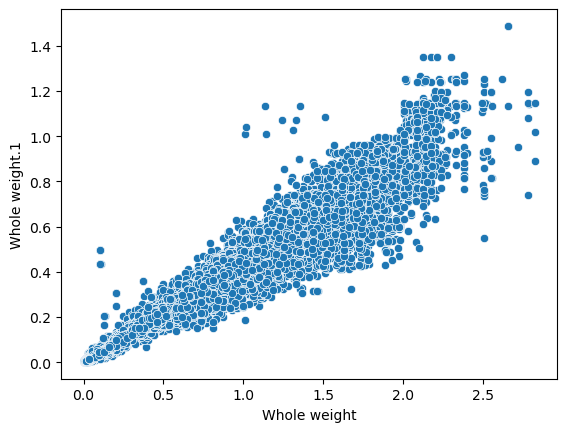

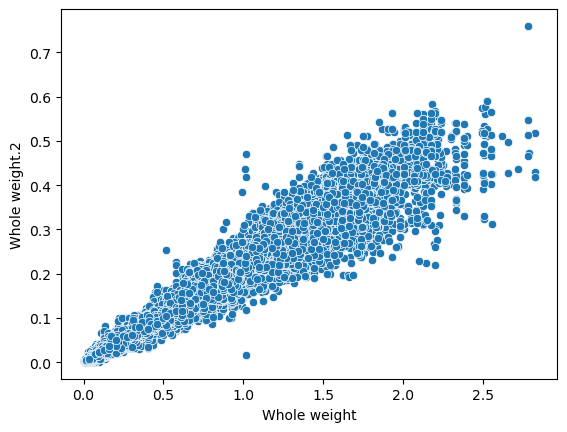

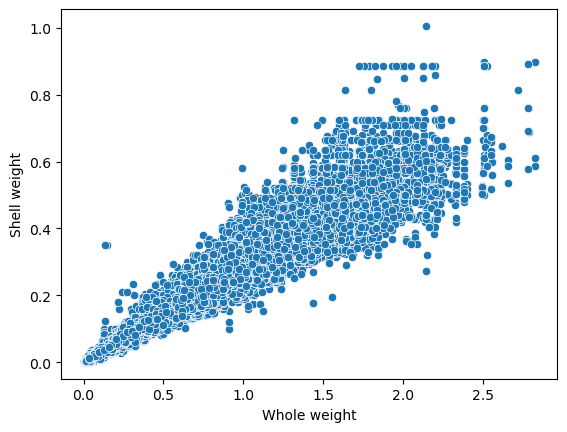

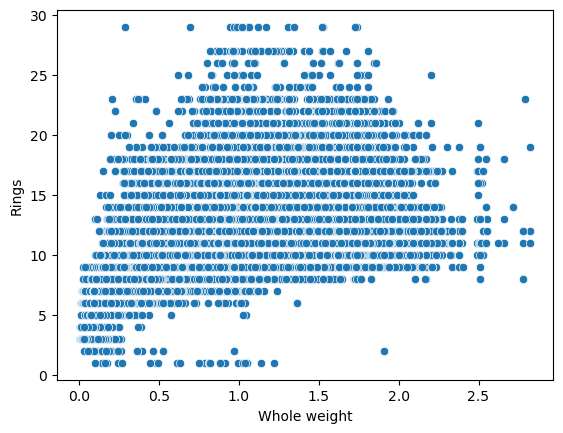

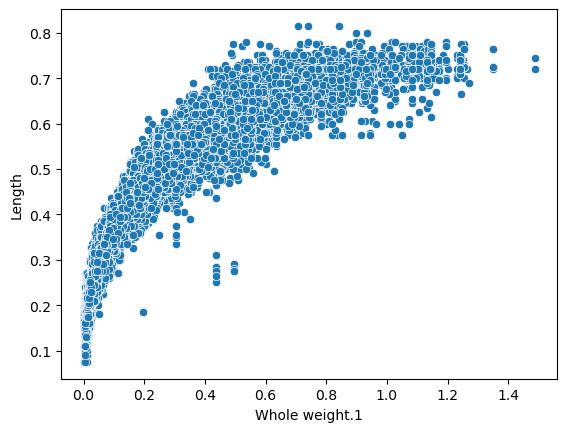

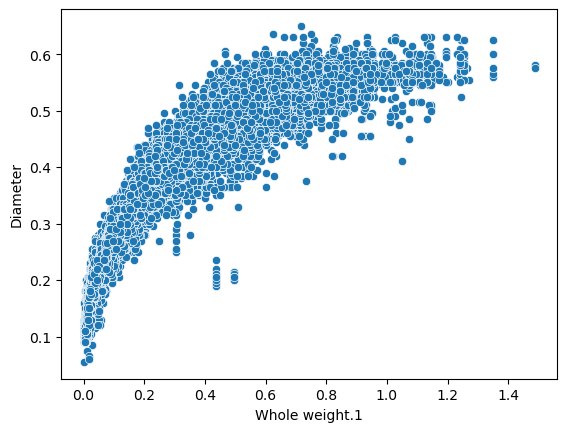

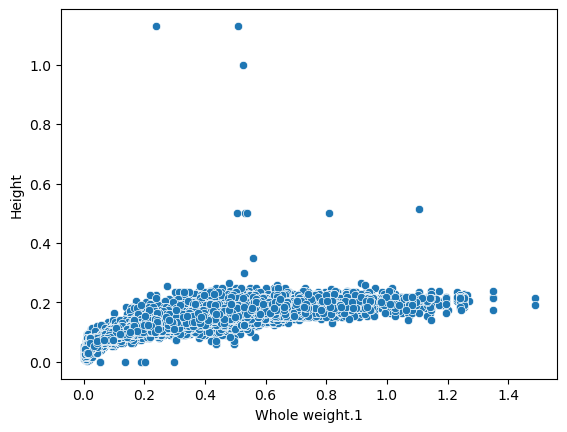

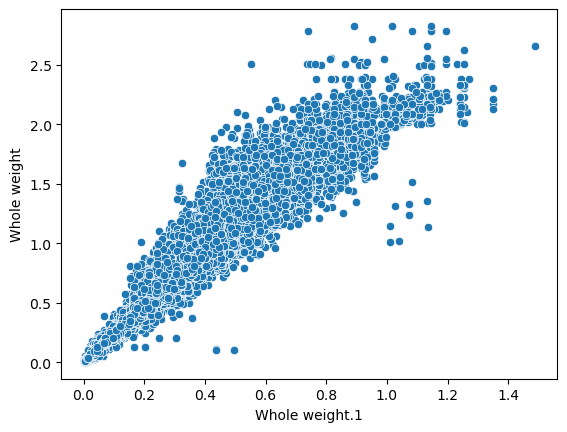

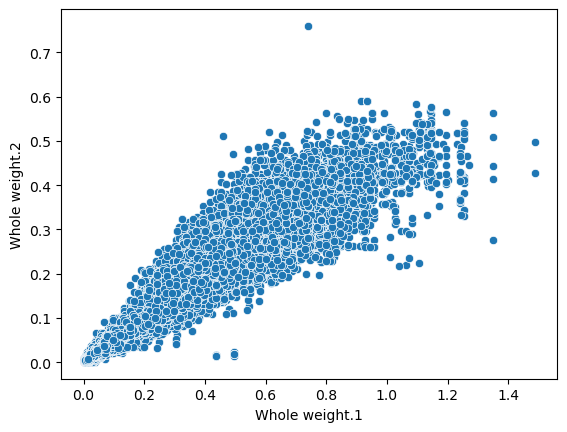

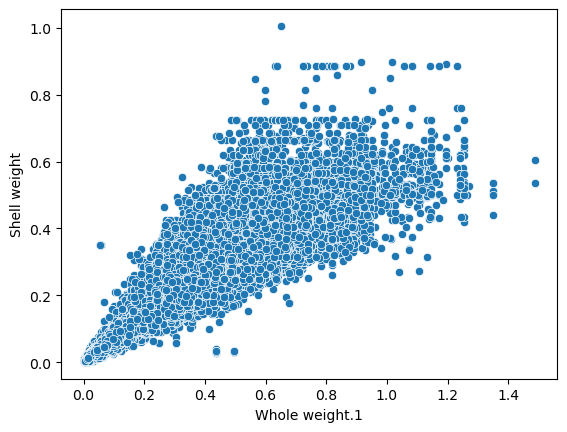

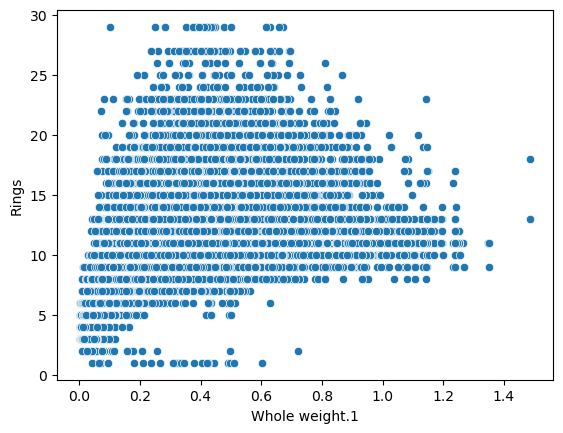

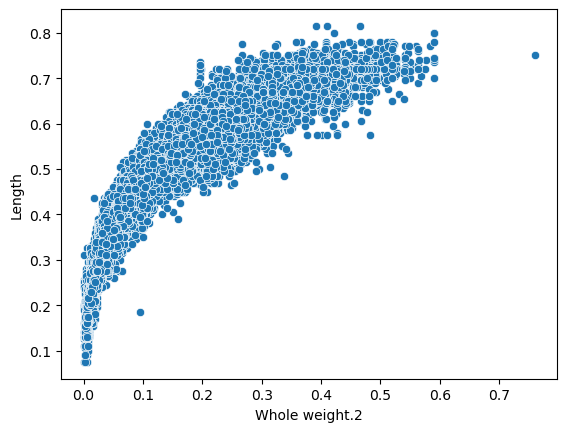

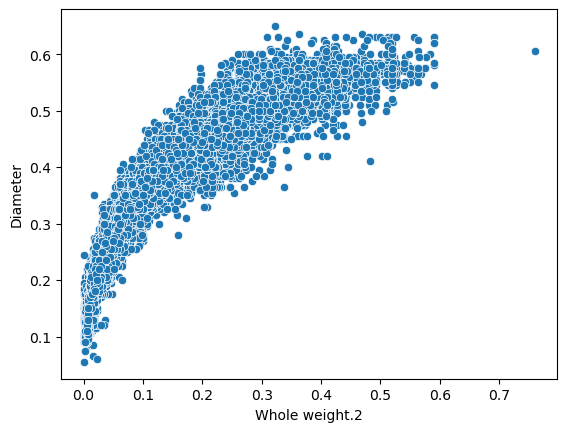

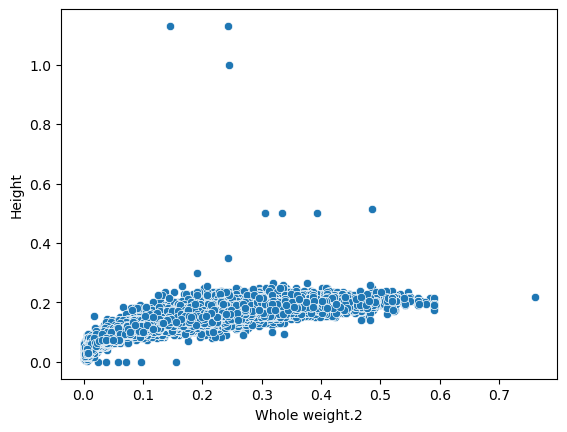

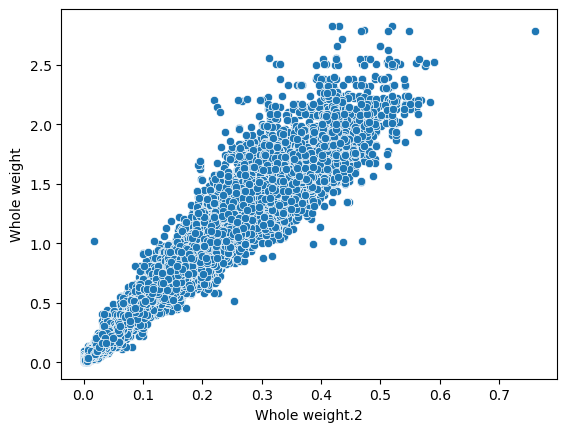

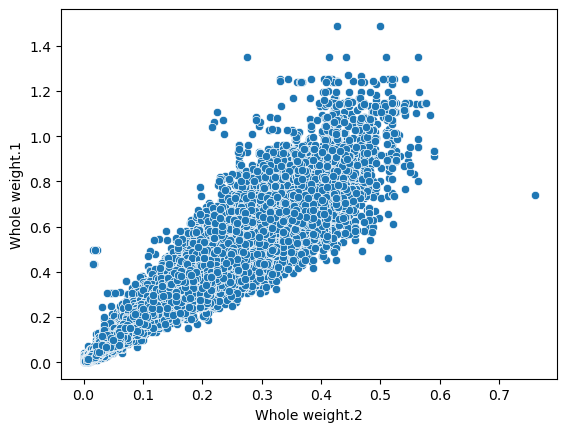

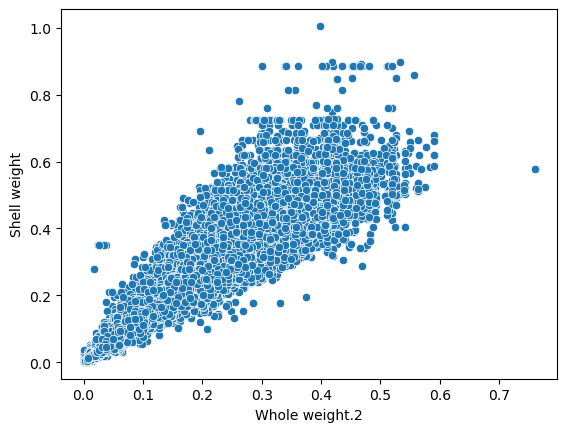

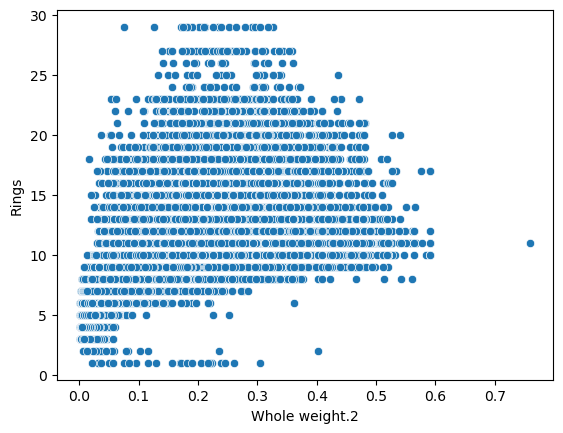

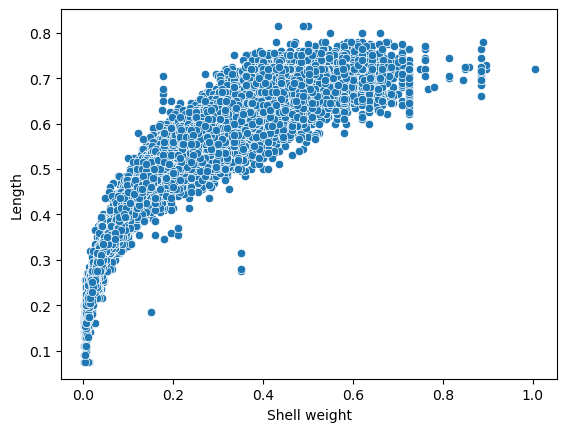

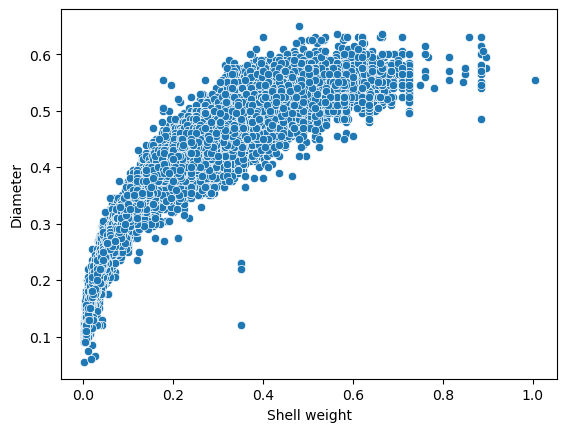

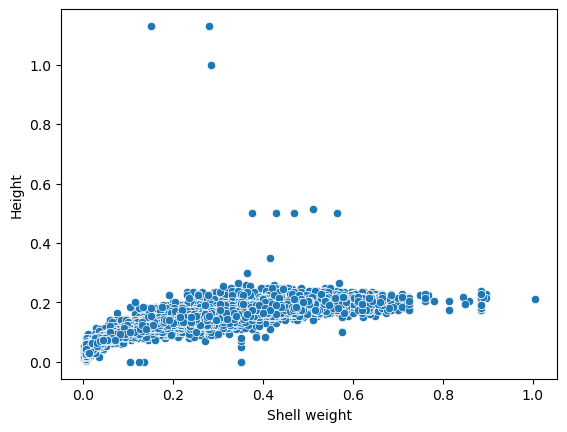

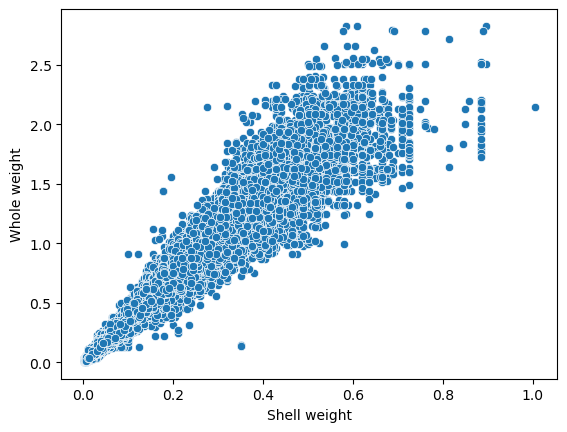

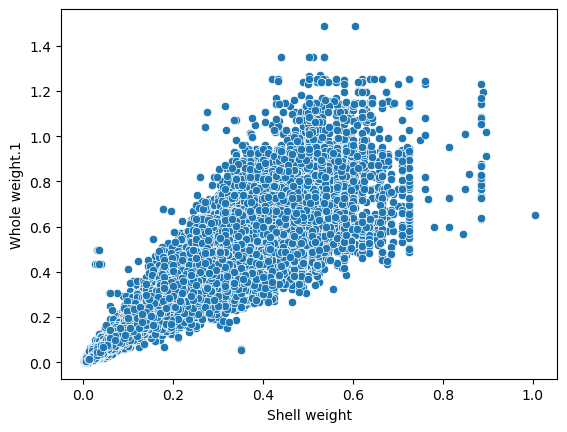

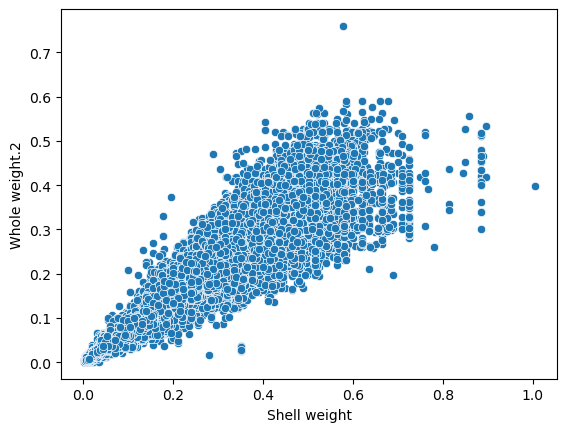

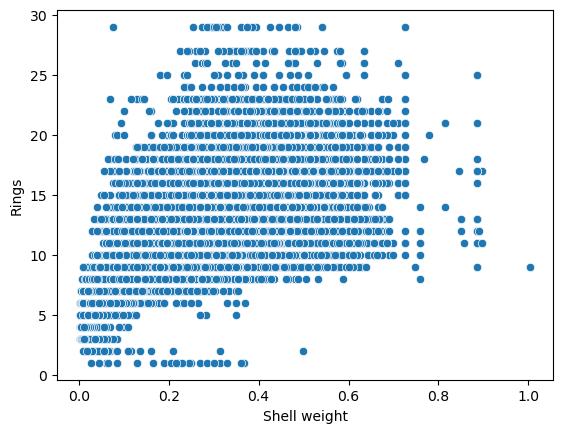

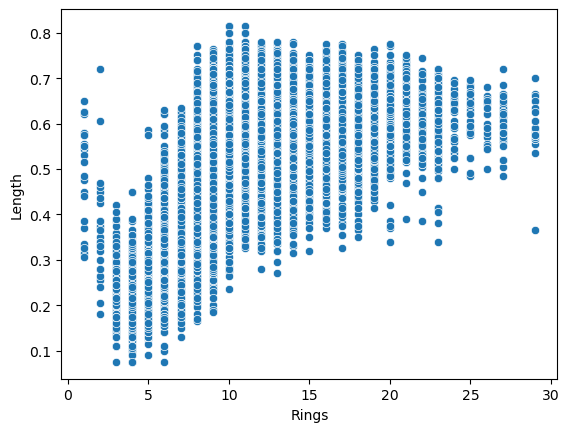

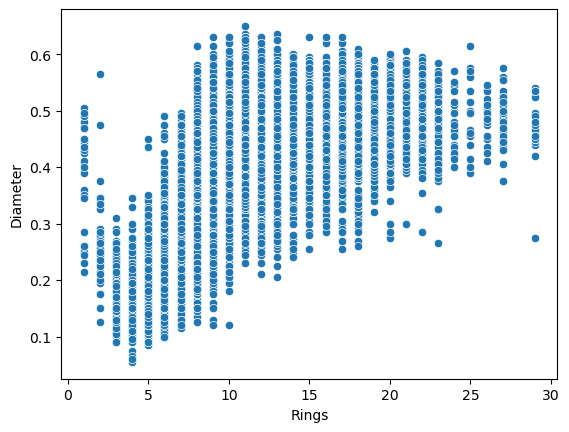

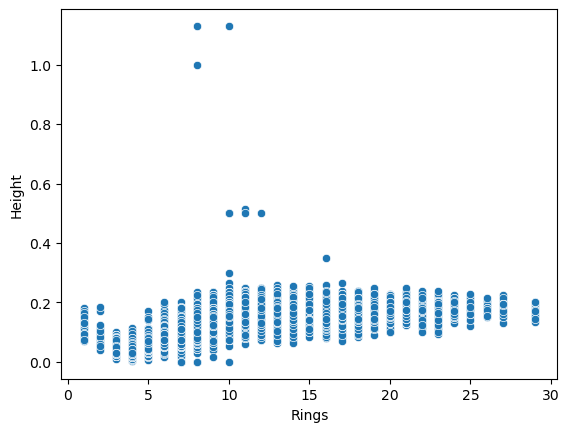

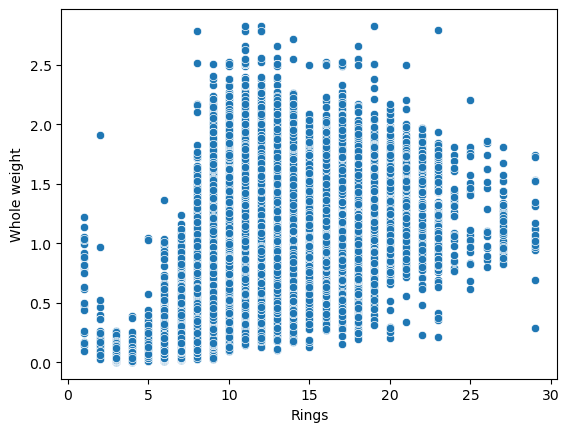

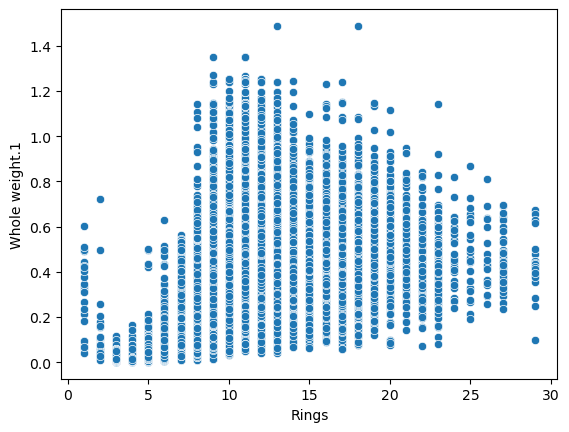

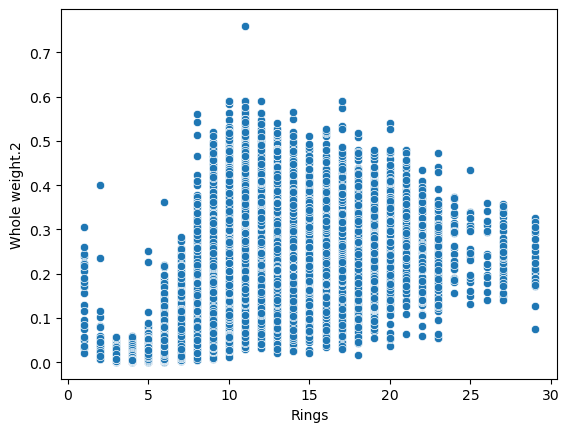

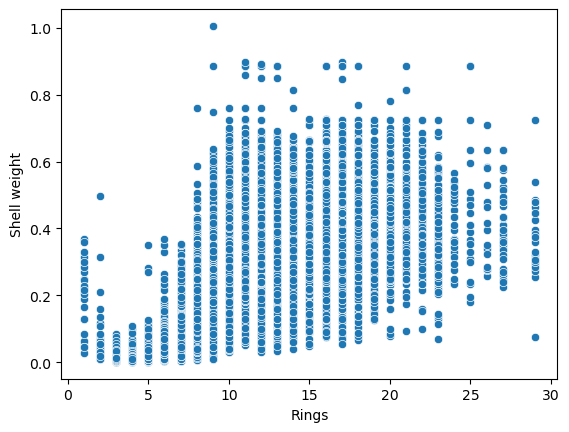

In [21]:
for i in df.columns:
    for j in df.columns:
        if i!=j and i!="id" and j!="id" and i!="Sex" and j!="Sex":
            sns.scatterplot(data=df,x=i,y=j)
            plt.show()

In [22]:
from scipy import stats
z = np.abs(stats.zscore(df))
print(z)

             id       Sex    Length  Diameter    Height  Whole weight  \
0      1.732032  1.320491  0.278317  0.288912  0.382451      0.038314   
1      1.731993  1.320491  0.955044  0.900996  0.250897      0.745005   
2      1.731955  0.062897  3.020727  2.975535  2.906386      1.678148   
3      1.731917  1.194697  0.658976  0.747975  0.382451      0.274140   
4      1.731879  0.062897  0.320613  0.237905  0.143763      0.015371   
...         ...       ...       ...       ...       ...           ...   
90610  1.731879  1.194697  1.540387  1.700360  1.590852      1.377712   
90611  1.731917  1.194697  0.320613  0.237905  0.382451      0.196573   
90612  1.731955  0.062897  0.694478  0.731228  1.064638      1.021559   
90613  1.731993  0.062897  1.455796  1.343312  1.590852      1.287035   
90614  1.732032  0.062897  0.779069  0.782235  0.933084      0.969119   

       Whole weight.1  Whole weight.2  Shell weight     Rings  
0            0.060061        0.227155      0.108309  0.4103

In [23]:
threshold = 3
print(np.where(z > 3))

(array([    2,    27,    29, ..., 90536, 90578, 90586]), array([2, 9, 9, ..., 8, 7, 9]))


In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

id                45307.0000
Sex                   2.0000
Length                0.1550
Diameter              0.1250
Height                0.0500
Whole weight          0.6485
Whole weight.1        0.2855
Whole weight.2        0.1460
Shell weight          0.1850
Rings                 3.0000
dtype: float64


In [25]:
print(df < (Q1 - 1.5 * IQR)) or (df > (Q3 + 1.5 * IQR))

          id    Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0      False  False   False     False   False         False           False   
1      False  False   False     False   False         False           False   
2      False  False    True      True    True         False           False   
3      False  False   False     False   False         False           False   
4      False  False   False     False   False         False           False   
...      ...    ...     ...       ...     ...           ...             ...   
90610  False  False   False     False   False         False           False   
90611  False  False   False     False   False         False           False   
90612  False  False   False     False   False         False           False   
90613  False  False   False     False   False         False           False   
90614  False  False   False     False   False         False           False   

       Whole weight.2  Shell weight  Rings  
0     

id    Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
0      False  False   False     False   False         False           False   
1      False  False   False     False   False         False           False   
2      False  False   False     False   False         False           False   
3      False  False   False     False   False         False           False   
4      False  False   False     False   False         False           False   
...      ...    ...     ...       ...     ...           ...             ...   
90610  False  False   False     False   False         False           False   
90611  False  False   False     False   False         False           False   
90612  False  False   False     False   False         False           False   
90613  False  False   False     False   False         False           False   
90614  False  False   False     False   False         False           False   

       Whole weight.2  Shell weight  Rings  
0               False         False  False  
1               False         False  False  
2               False         False  False  
3               False         False  False  
4               False         False  False  
...               ...           ...    ...  
90610           False         False  False  
90611           False         False  False  
90612           False         False  False  
90613           False         False  False  
90614           False         False  False  

[90615 rows x 10 columns]

In [26]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Lower and Upperbonds")
    print(lower_bound,upper_bound)
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    return outliers

Lower and Upperbonds
0.03499999999999999 0.23500000000000001
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
2          2    2   0.160     0.110   0.025        0.0210          0.0055   
349      349    2   0.155     0.115   0.025        0.0155          0.0065   
800      800    2   0.185     0.125   0.025        0.0280          0.0095   
1095    1095    2   0.260     0.180   0.030        0.0930          0.0255   
1207    1207    2   0.165     0.120   0.030        0.0215          0.0070   
...      ...  ...     ...       ...     ...           ...             ...   
90295  90295    3   0.430     0.325   0.000        0.3335          0.1350   
90390  90390    2   0.160     0.120   0.025        0.0425          0.0175   
90394  90394    2   0.215     0.150   0.030        0.0385          0.0125   
90497  90497    2   0.175     0.130   0.030        0.0315          0.0125   
90585  90585    2   0.175     0.130   0.030        0.0325          0.014

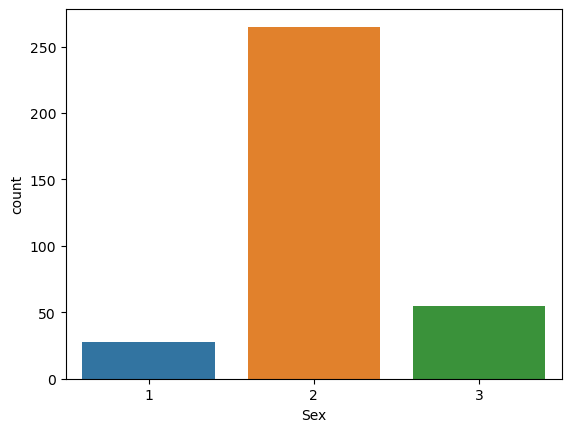

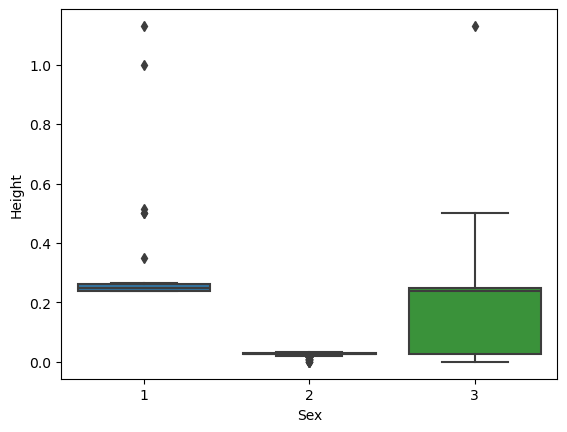

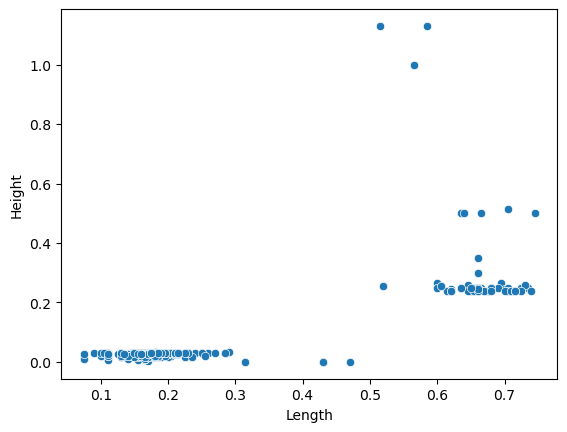

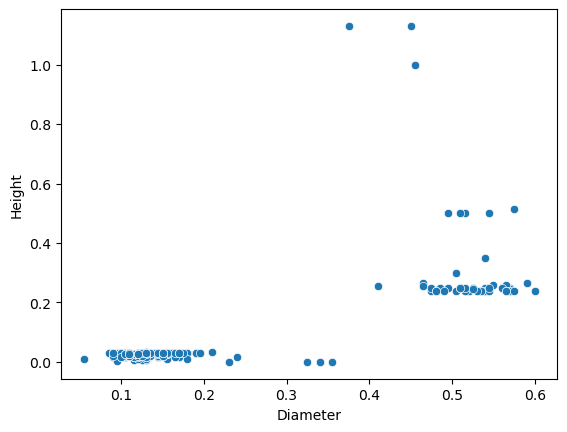

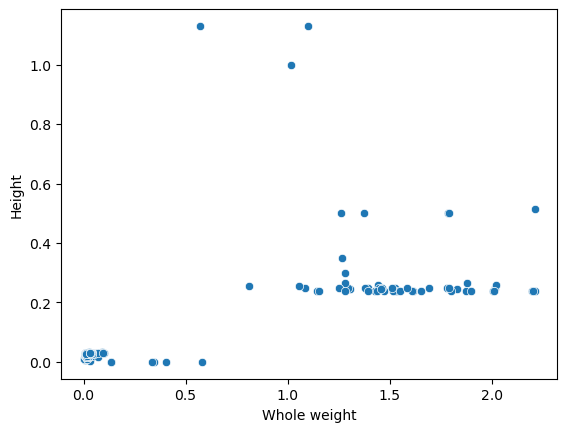

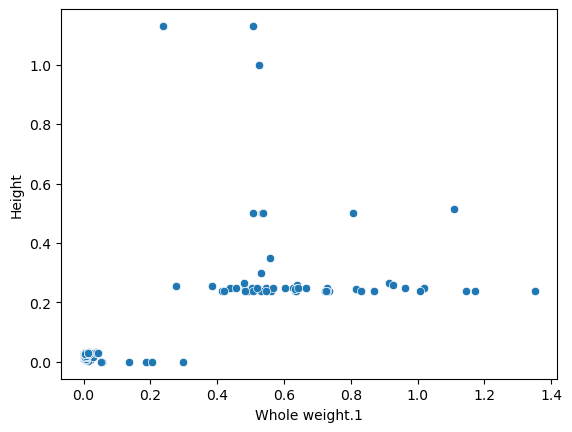

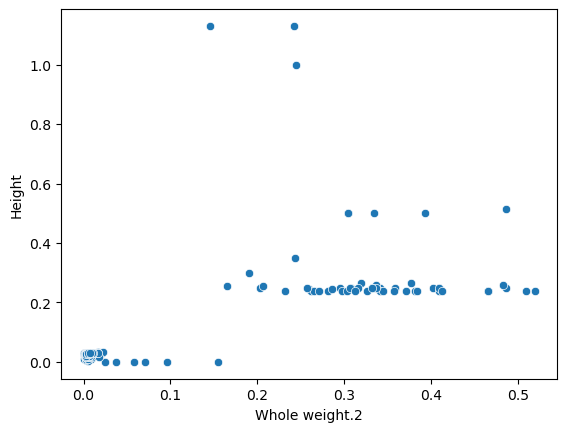

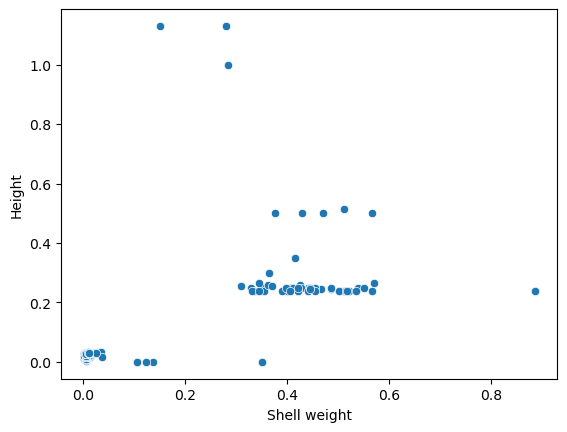

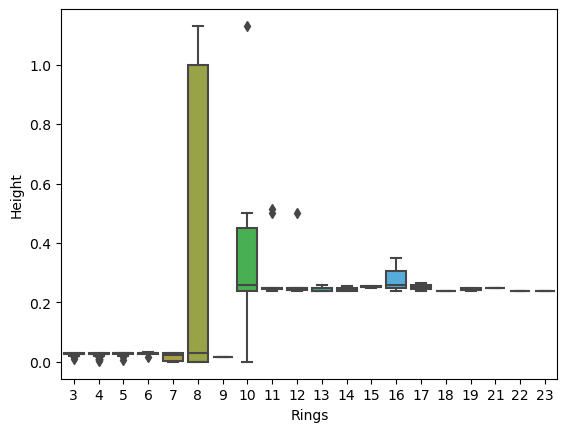

In [27]:
col = "Height"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


Lower and Upperbonds
0.21250000000000005 0.8324999999999999
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
2          2    2   0.160     0.110   0.025        0.0210          0.0055   
8          8    2   0.205     0.150   0.040        0.0460          0.0145   
28        28    2   0.180     0.110   0.040        0.0315          0.0105   
36        36    3   0.180     0.125   0.040        0.0275          0.0110   
83        83    3   0.165     0.125   0.055        0.0110          0.0045   
...      ...  ...     ...       ...     ...           ...             ...   
90268  90268    2   0.155     0.110   0.025        0.0140          0.0055   
90390  90390    2   0.160     0.120   0.025        0.0425          0.0175   
90445  90445    2   0.160     0.110   0.045        0.0130          0.0045   
90497  90497    2   0.175     0.130   0.030        0.0315          0.0125   
90585  90585    2   0.175     0.130   0.030        0.0325          0.0140

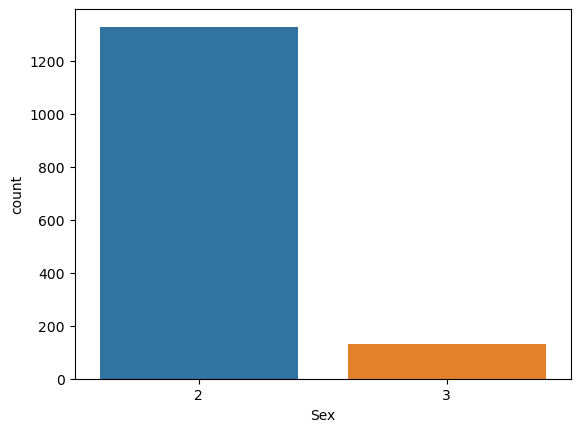

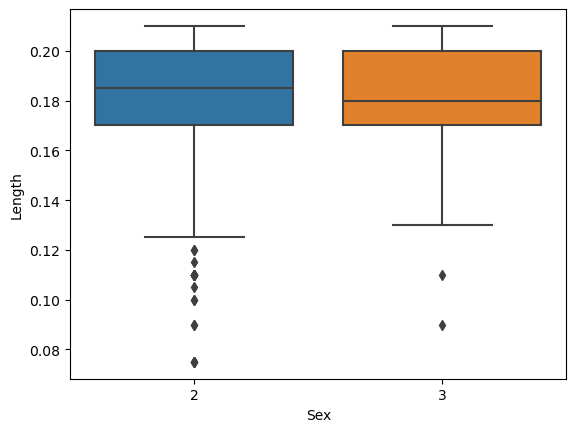

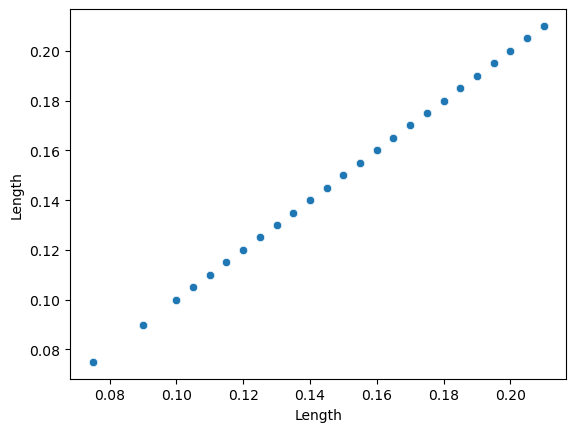

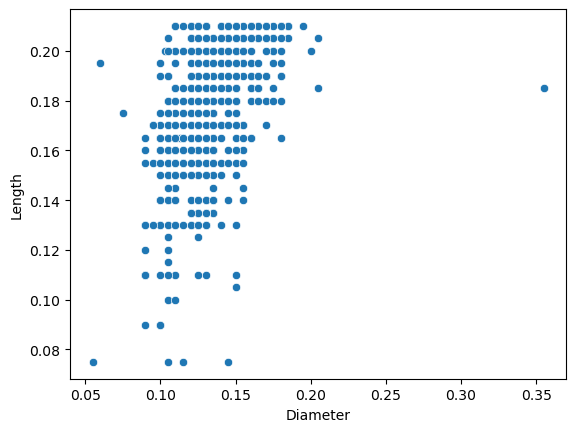

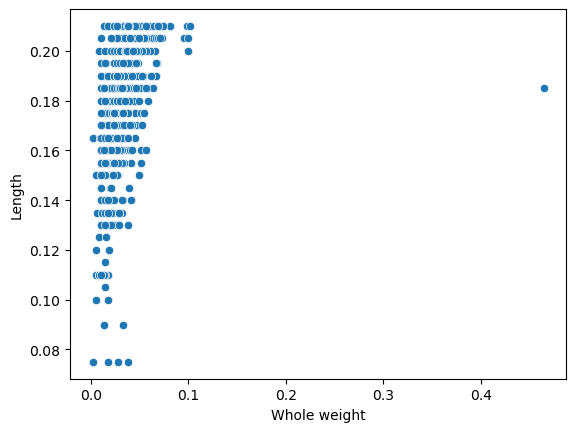

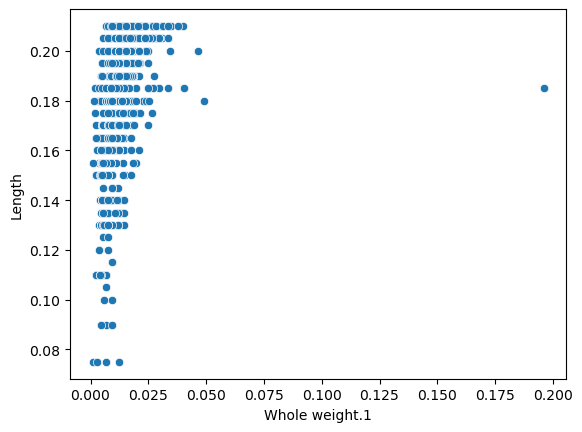

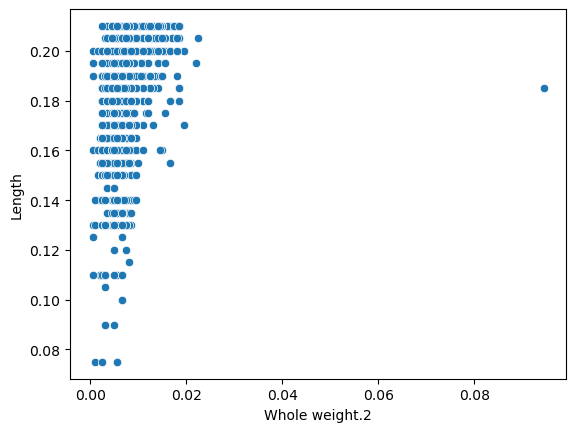

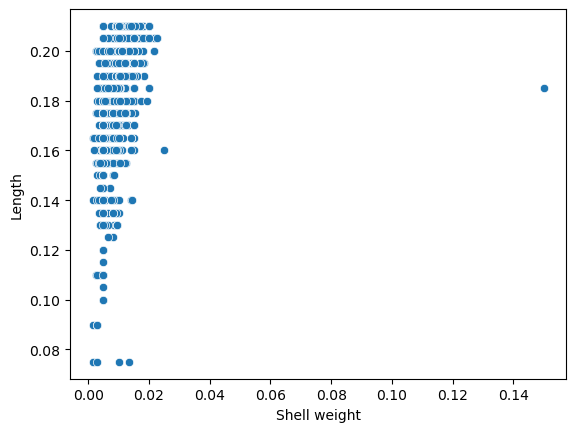

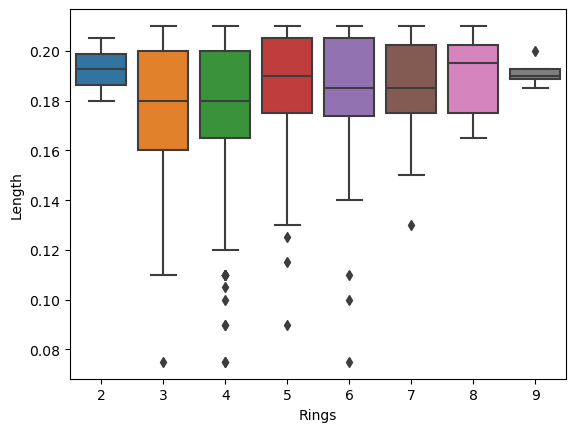

In [28]:
col = "Length"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


Lower and Upperbonds
0.15749999999999997 0.6575
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
2          2    2   0.160     0.110   0.025        0.0210          0.0055   
8          8    2   0.205     0.150   0.040        0.0460          0.0145   
28        28    2   0.180     0.110   0.040        0.0315          0.0105   
36        36    3   0.180     0.125   0.040        0.0275          0.0110   
83        83    3   0.165     0.125   0.055        0.0110          0.0045   
...      ...  ...     ...       ...     ...           ...             ...   
90394  90394    2   0.215     0.150   0.030        0.0385          0.0125   
90398  90398    2   0.215     0.150   0.045        0.0545          0.0190   
90445  90445    2   0.160     0.110   0.045        0.0130          0.0045   
90497  90497    2   0.175     0.130   0.030        0.0315          0.0125   
90585  90585    2   0.175     0.130   0.030        0.0325          0.0140   

       

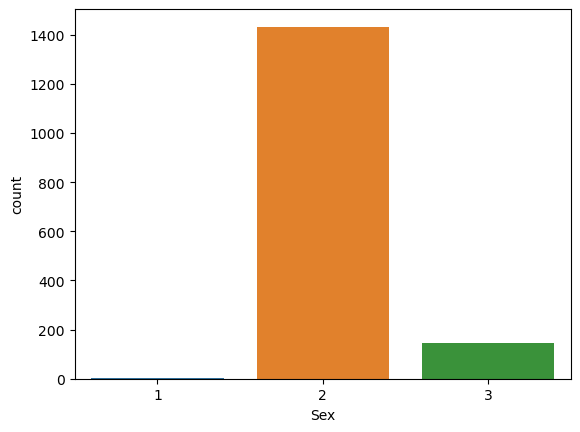

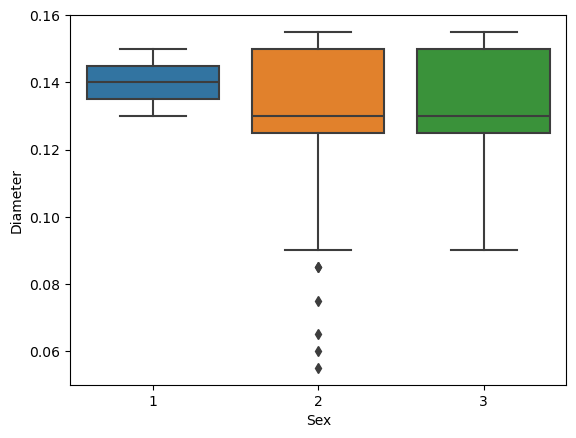

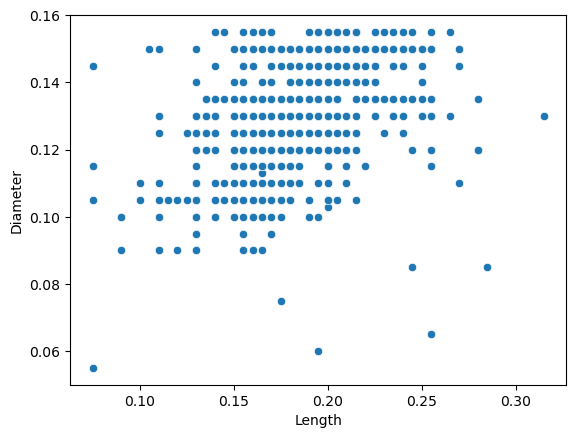

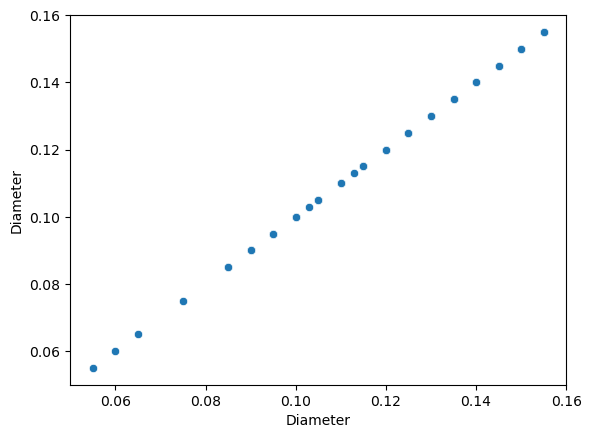

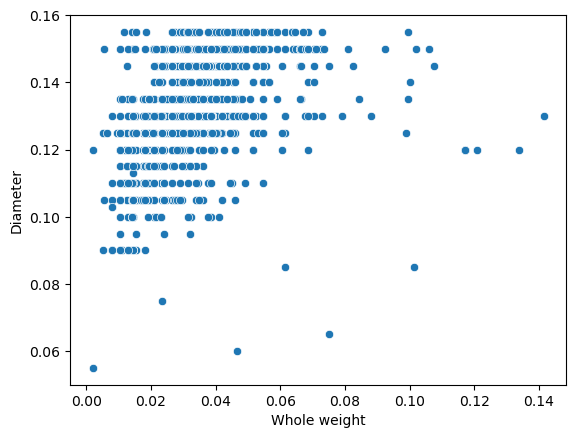

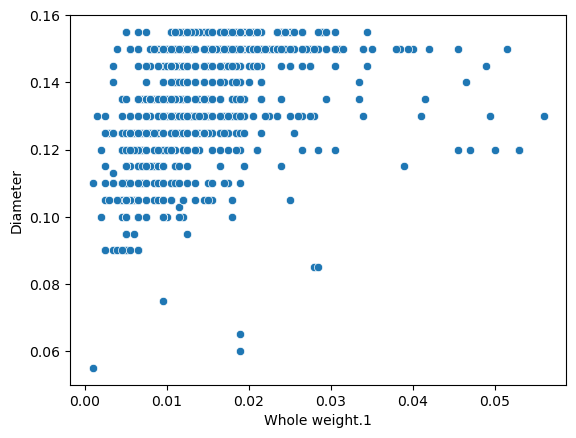

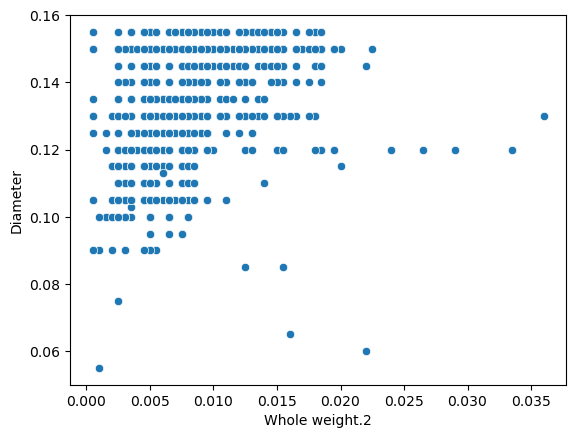

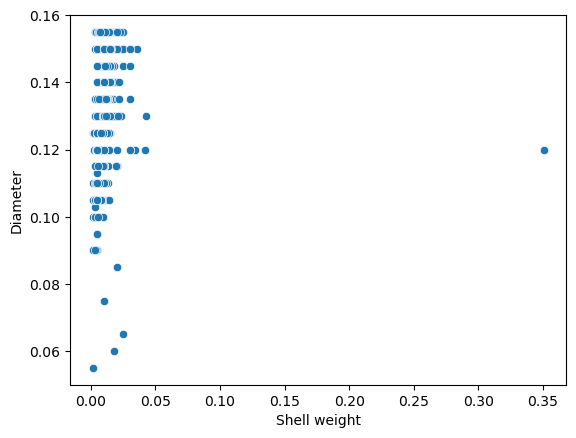

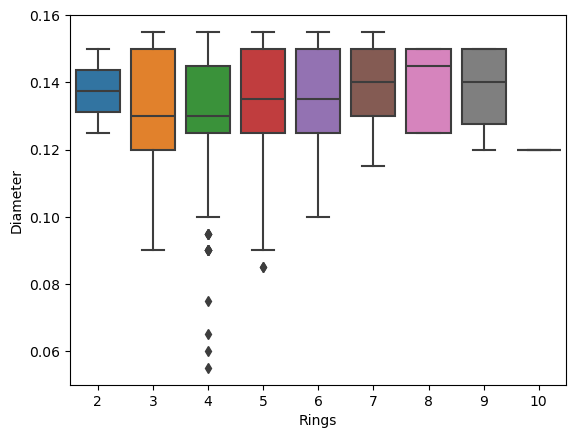

In [29]:
col = "Diameter"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


Lower and Upperbonds
-0.5537499999999997 2.0402499999999995
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
649      649    3   0.705     0.570   0.225        2.5550          0.8155   
670      670    1   0.720     0.550   0.210        2.0690          0.9205   
942      942    1   0.765     0.585   0.215        2.1730          0.8010   
957      957    3   0.720     0.555   0.195        2.3810          0.9310   
1353    1353    3   0.645     0.525   0.205        2.5085          0.5515   
...      ...  ...     ...       ...     ...           ...             ...   
90234  90234    3   0.755     0.625   0.230        2.0885          0.8265   
90396  90396    3   0.745     0.565   0.190        2.1410          1.0410   
90419  90419    3   0.715     0.570   0.175        2.0885          1.0615   
90531  90531    3   0.720     0.550   0.220        2.1730          1.0815   
90536  90536    3   0.740     0.595   0.195        2.5500          1.1965

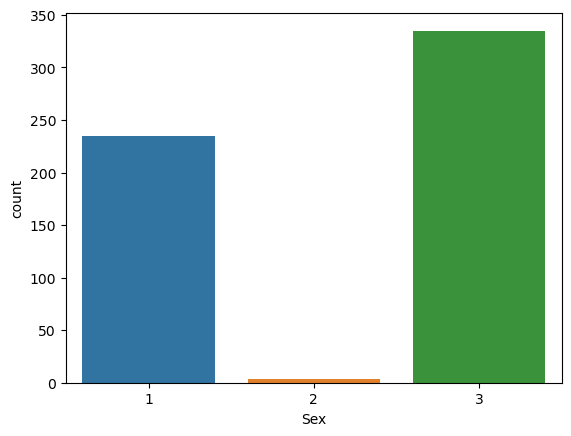

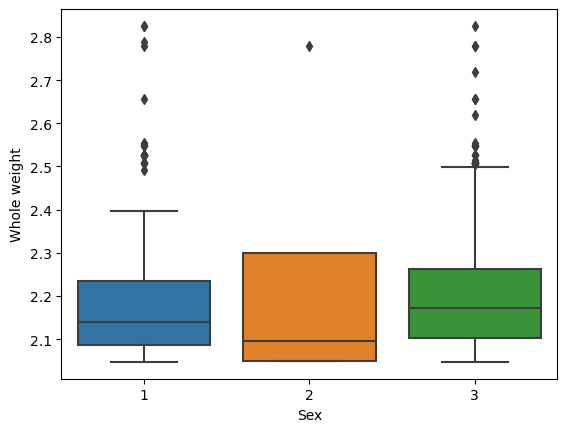

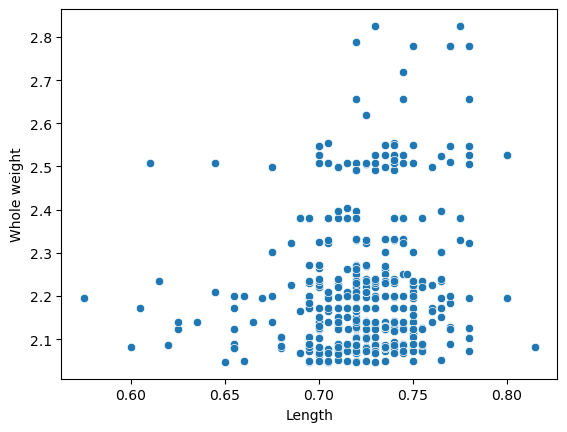

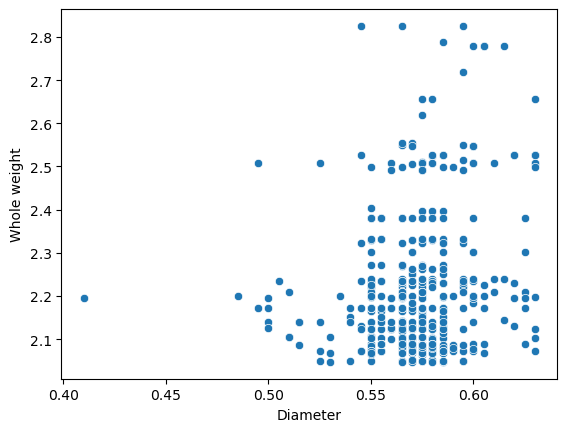

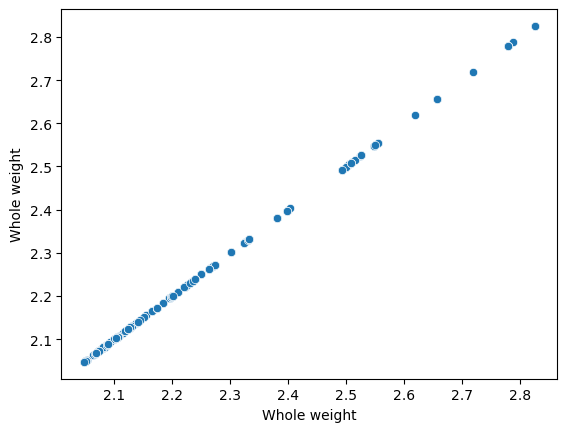

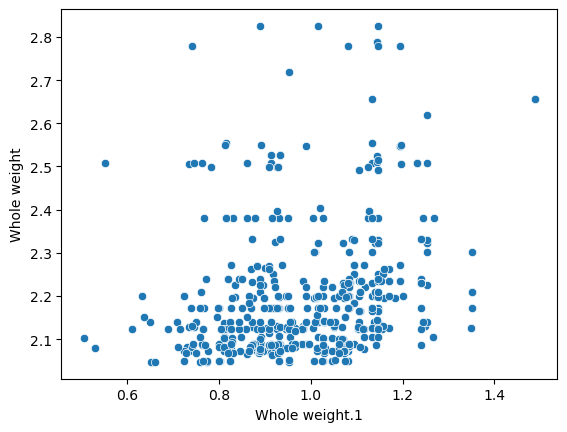

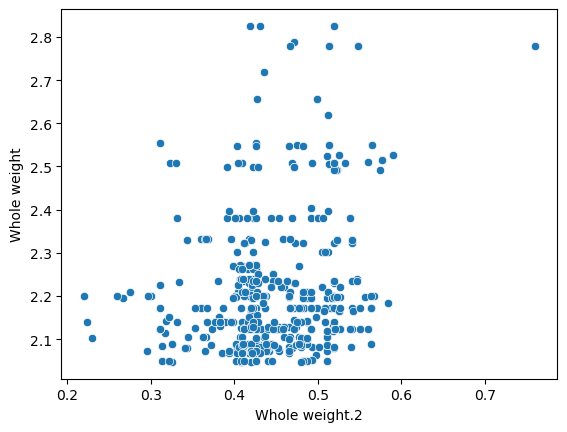

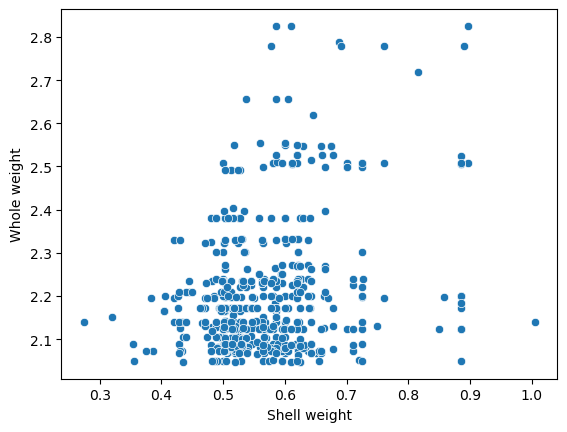

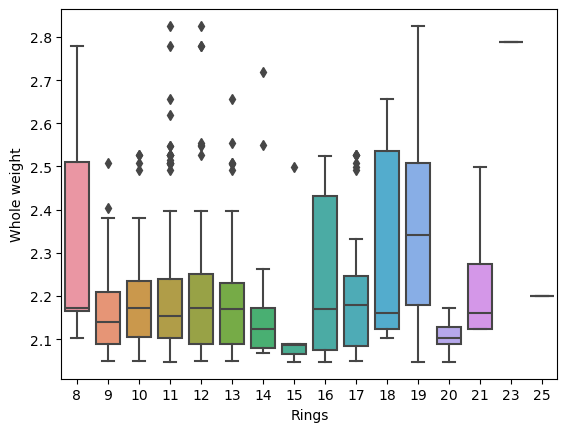

In [30]:
col ="Whole weight"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


Lower and Upperbonds
-0.25075000000000003 0.8912500000000001
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
62        62    3   0.725     0.565   0.205        1.9260          0.9590   
150      150    1   0.675     0.530   0.185        1.9485          0.9455   
440      440    3   0.710     0.555   0.215        1.9330          0.9155   
655      655    1   0.720     0.575   0.210        1.9335          0.9260   
670      670    1   0.720     0.550   0.210        2.0690          0.9205   
...      ...  ...     ...       ...     ...           ...             ...   
90470  90470    1   0.695     0.565   0.205        1.9380          0.9440   
90508  90508    3   0.690     0.525   0.185        1.8395          0.9330   
90513  90513    3   0.710     0.550   0.195        2.0045          1.0115   
90531  90531    3   0.720     0.550   0.220        2.1730          1.0815   
90536  90536    3   0.740     0.595   0.195        2.5500          1.196

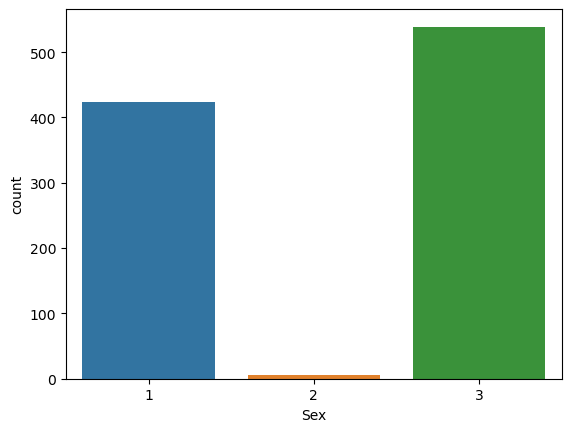

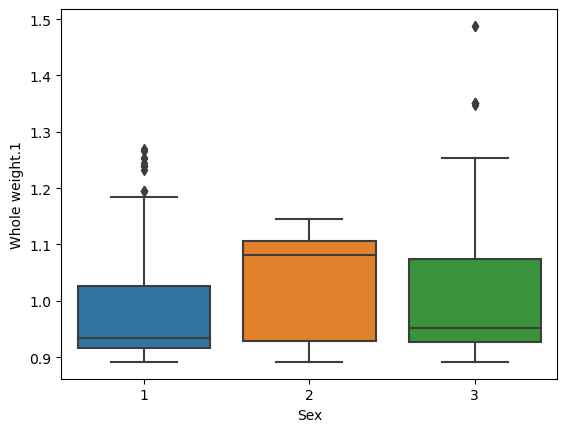

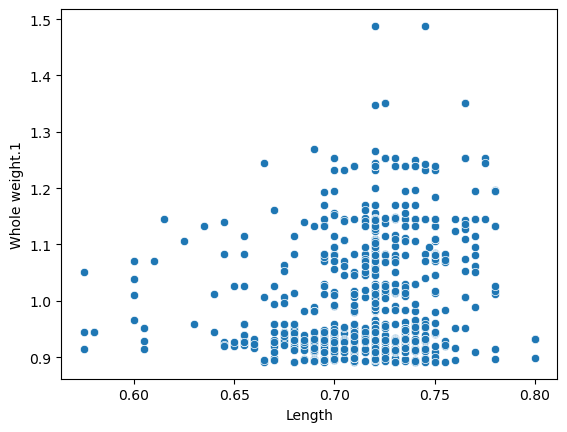

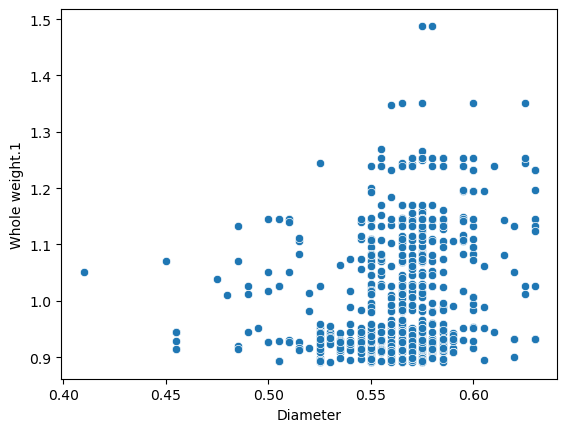

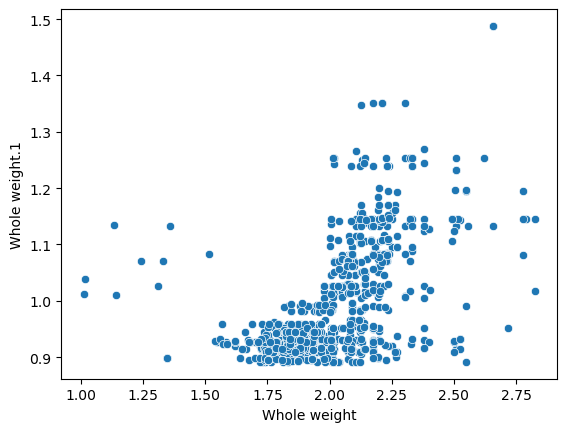

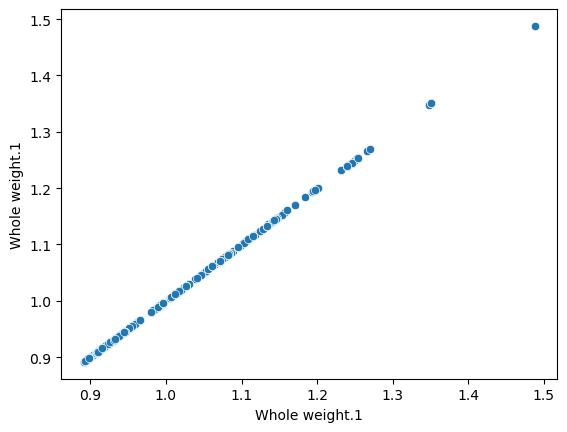

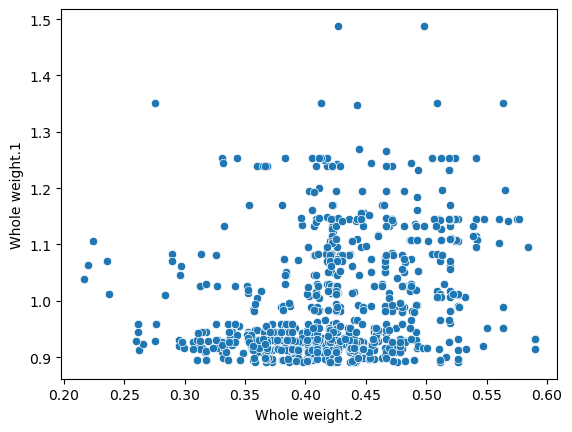

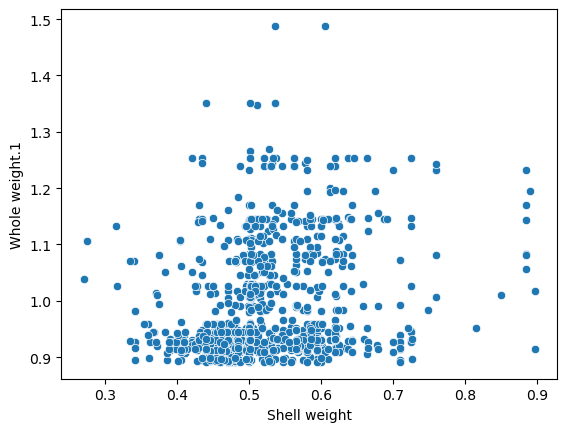

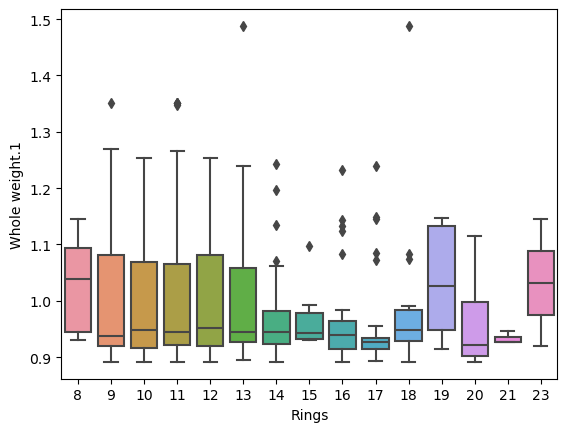

In [31]:
col = "Whole weight.1"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


Lower and Upperbonds
-0.13250000000000003 0.4515
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
240      240    3   0.710     0.565   0.190        1.9380          0.8835   
655      655    1   0.720     0.575   0.210        1.9335          0.9260   
942      942    1   0.765     0.585   0.215        2.1730          0.8010   
957      957    3   0.720     0.555   0.195        2.3810          0.9310   
1346    1346    1   0.735     0.565   0.225        2.0370          0.8700   
...      ...  ...     ...       ...     ...           ...             ...   
90234  90234    3   0.755     0.625   0.230        2.0885          0.8265   
90396  90396    3   0.745     0.565   0.190        2.1410          1.0410   
90531  90531    3   0.720     0.550   0.220        2.1730          1.0815   
90536  90536    3   0.740     0.595   0.195        2.5500          1.1965   
90578  90578    1   0.760     0.575   0.205        2.0150          0.8010   

      

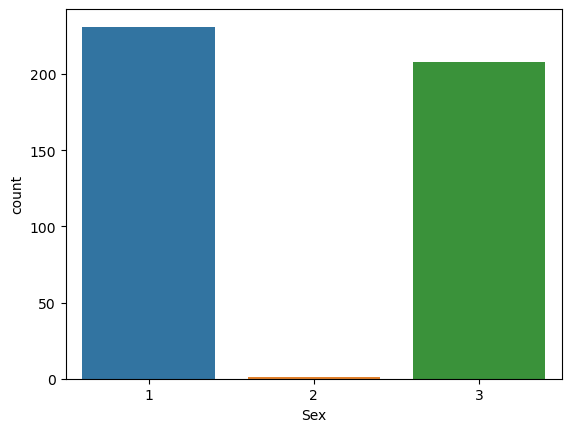

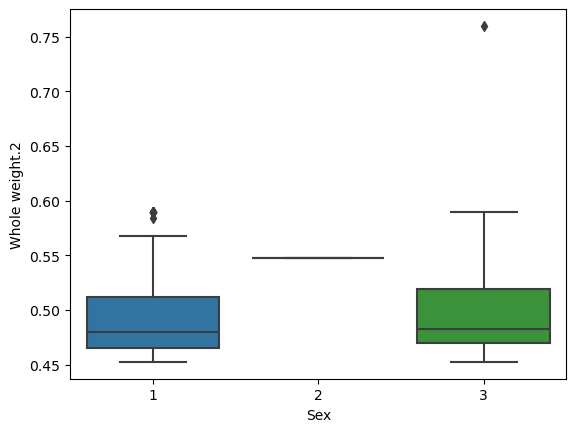

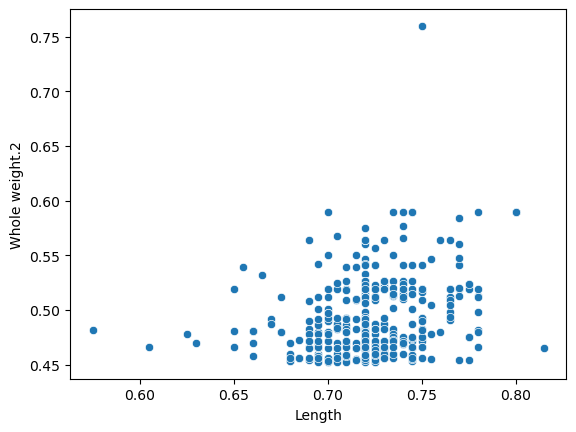

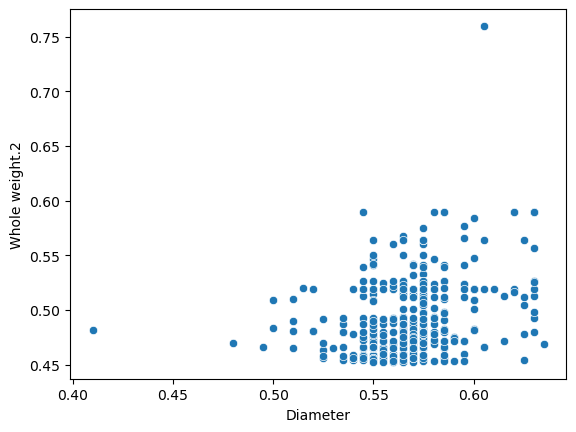

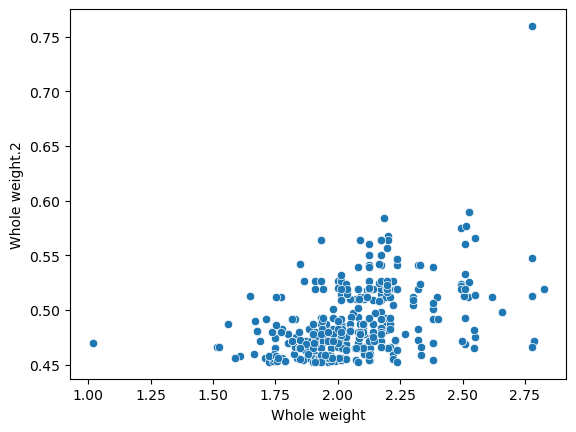

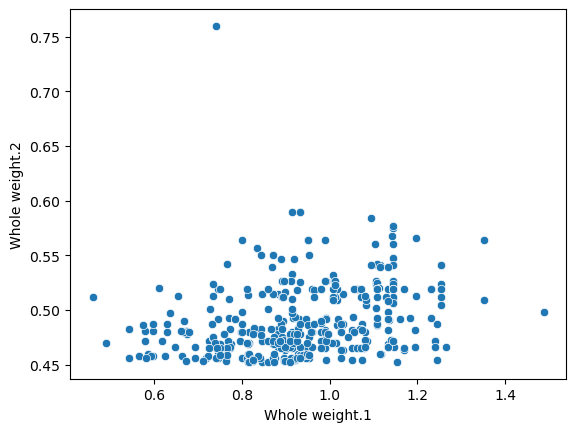

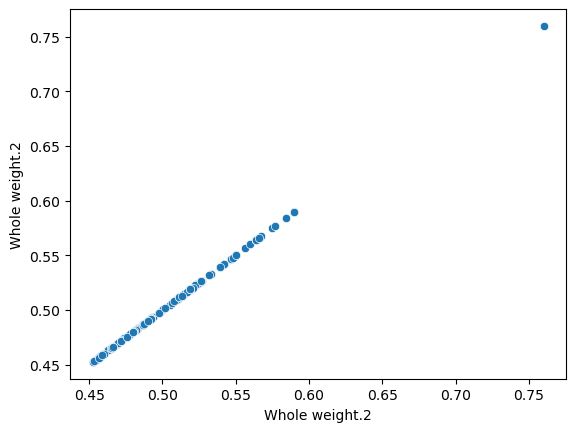

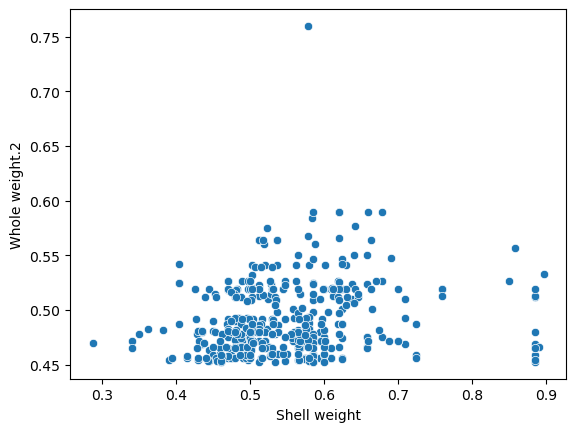

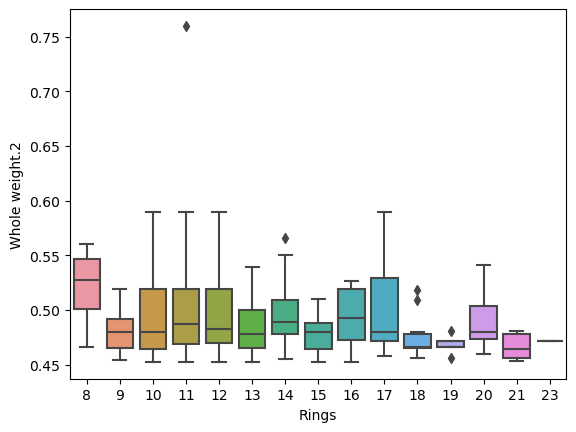

In [32]:
col = "Whole weight.2"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


Lower and Upperbonds
-0.15749999999999997 0.5825
Rows with Outliers:
          id  Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
321      321    1   0.775     0.570   0.205        2.0320          0.5800   
440      440    3   0.710     0.555   0.215        1.9330          0.9155   
612      612    3   0.735     0.565   0.230        2.0330          0.7510   
670      670    1   0.720     0.550   0.210        2.0690          0.9205   
942      942    1   0.765     0.585   0.215        2.1730          0.8010   
...      ...  ...     ...       ...     ...           ...             ...   
90124  90124    3   0.700     0.545   0.200        1.5230          0.6125   
90128  90128    1   0.655     0.580   0.200        1.8075          0.5615   
90303  90303    1   0.655     0.540   0.195        1.7445          0.6205   
90461  90461    1   0.635     0.510   0.215        1.5140          0.5260   
90536  90536    3   0.740     0.595   0.195        2.5500          1.1965   

      

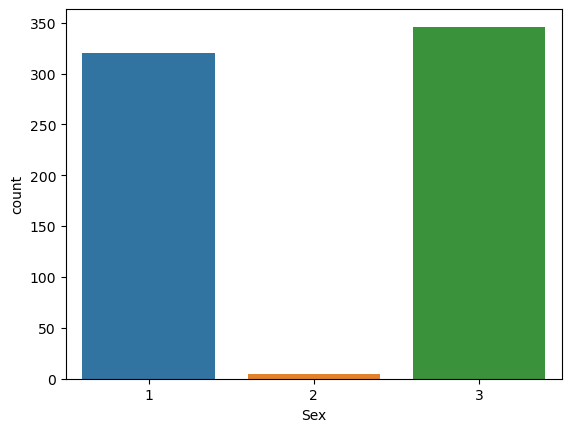

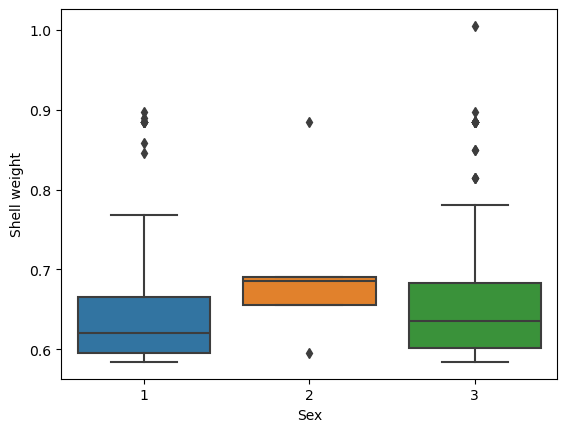

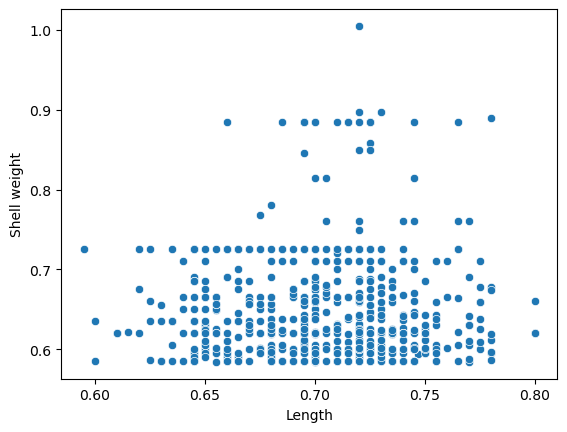

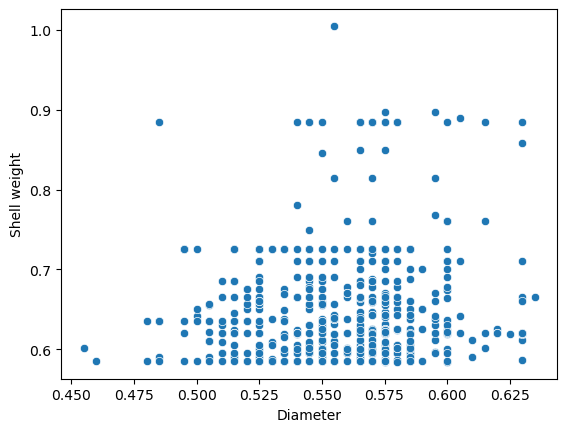

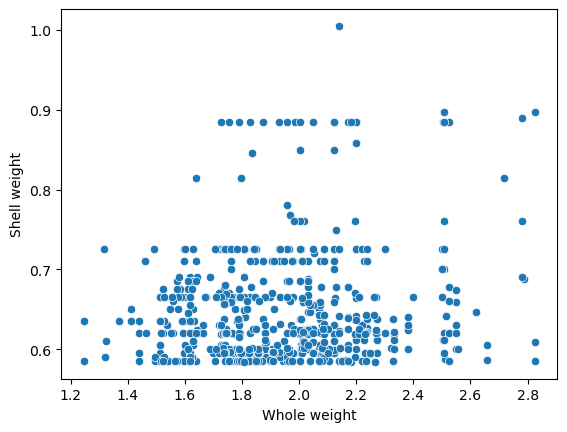

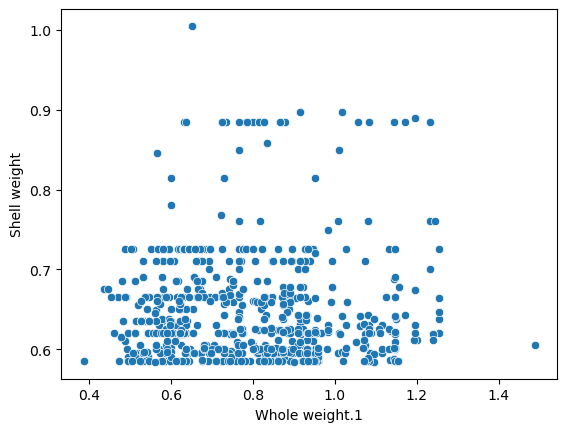

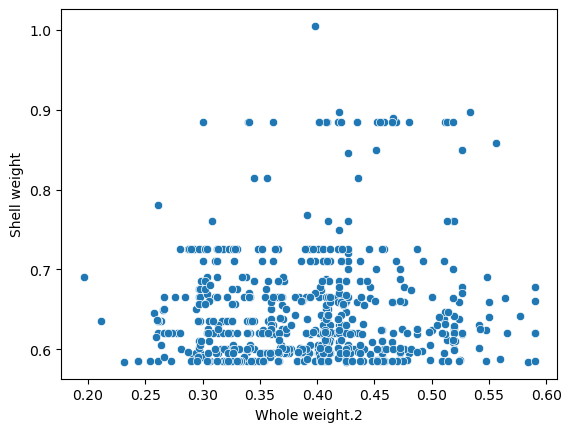

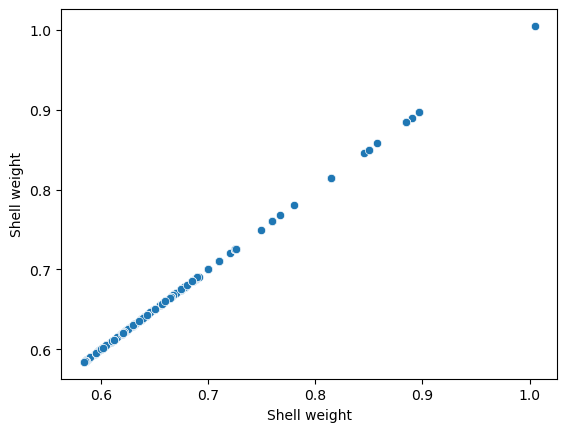

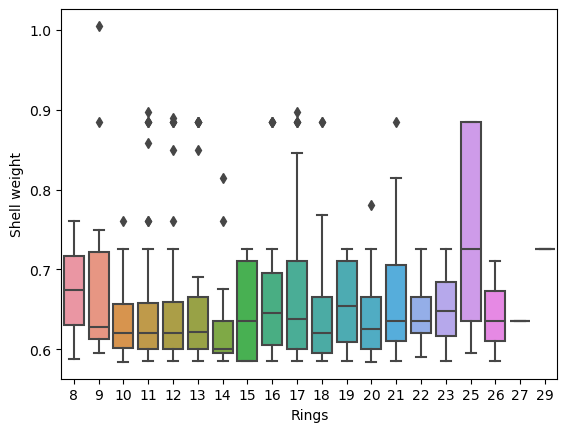

In [33]:
col = "Shell weight"
outlier_indices = detect_outliers(df[col])  # Replace 'column_name' with the actual column name
outlier_rows_height = df.iloc[outlier_indices[0]]
print("Rows with Outliers:")
print(outlier_rows_height)

sns.countplot(data=outlier_rows_height, x="Sex")
plt.show()

sns.boxplot(data=outlier_rows_height, x="Sex", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Length", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Diameter", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.1", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Whole weight.2", y=col)
plt.show()

sns.scatterplot(data=outlier_rows_height, x="Shell weight", y=col)
plt.show()

sns.boxplot(data=outlier_rows_height, x="Rings", y=col)
plt.show()


In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(["Rings"],axis=1),df["Rings"],test_size=0.2,random_state=13)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,accuracy_score
lin=LinearRegression()
lin.fit(X_train,y_train)
y_p=lin.predict(X_test)
print(mean_absolute_error(y_test,y_p))
print(accuracy_score(np.round(y_p,int),y_test))

1.403393922928173


TypeError: 'type' object cannot be interpreted as an integer

In [42]:
np.round(y_p)

array([ 9., 11., 10., ...,  9.,  8., 12.])

In [41]:
y_test

22604     9
47699    11
55170    10
7289      9
11353     9
         ..
34915    20
11531     4
30904    10
73588     7
81709    18
Name: Rings, Length: 18123, dtype: int64

In [47]:
y_test.head(12)

22604     9
47699    11
55170    10
7289      9
11353     9
10243     9
32545     6
10921    18
33650     9
40687     7
50631    12
76072    12
Name: Rings, dtype: int64

In [48]:
y_p[:12]

array([ 9.11392537, 10.64592074, 10.27229031, 10.2125071 , 10.02544398,
        8.84837798,  6.50593007, 17.54427356,  9.38508908,  6.01623841,
        9.74420781,  9.82842   ])